# Drug Abuse Risk and Personality

**Introduction**

This project aims at unravelling the relationship between personality traits and drug consumption.
First, the normalized data was transformed into more apprehensible, numeric categories. 
Then further features were engineered to highlight deeper data structures. The engineered variables are: soft drug consumption, hard drug consumption, legal drug consumption, illegal drug consumption, synthetic and nonsynthetic drug consumption, recent consumtion, hard score and hardliners. 

The hard score (hard_score) is build of the mean of neuroticism, extraversion, impulsiveness and sensation seeking. The hardliner variable, however, comprises only the 10% highest hard scores. 


**Import packages**

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


#split data into test and training data sets
from sklearn.model_selection import train_test_split

#packages for building a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report 

#feature importance
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel

#import classification models
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#GridSearch model improvement
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold


# Meta Data

## Variable Overview

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
| id | unique identified for a person                    |                                           | ordnial     |
| Age       | Age of participant         | 1 = 18-24, 2 = 25-34, 3 = 35-44, 4 = 45-54, 5 = 55-64, 6 = 65+            | ordinal |
| Gender     |     Gender             |   0 = male, 1 = female                           | nominal |
| Education  |   Sducation level of participants   |    1 = left school before 16 y/o, 2 = left school at 16 y/o, 3 = left school at 17 y/o, 4 = left school at 18 y/o, 5 = some college or university, w/o certificate or degree, 6 = professional certificate/diploma, 7 = university degree undergraduate, 8 = university master's degree, 9 = doctor's degree                                             | ordinal       |
| Country | Country of residence     |   1 = Australia, 2 = Canada, 3 = New Zealand, 4 = Other, 5 = Republic of Ireland, 6 = UK, 7 = USA   | nominal       |
| Ethnicity   | Ethnicity of participant |  1 = Asian, 2 = Black, 3 = Mixed-Black/Asian, 4 = Mixed-White/Asian, 5 = Mixed-White/Black, 6 = Other, 7 = White  | nominal         |
| Nscore   | NEO-FFI-R Neuroticism|                                                | ratio     |
| Escore    |NEO-FFI-R Extraversion|                                                | ratio       |
| Oscore | NEO-FFI-R Openness to experience|                                                | nominal     |
| Ascore      | NEO-FFI-R Agreeableness |                                                |nominal |
| Cscore  |NEO-FFI-R Conscientiousness|                                                | ordinal  
| Impulsive     | Impulsiveness measured by BIS-11 |                                                | ordinal  
| SS  | Sensation Seeking measured by ImpSS |                                            | ordinal  
| Alcohol  | Alcohol        | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day | ordinal  
| Amphet  |    Amphetamines   |  0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal
| Amyl  |  Amyl Nitrite    | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Benzos  |     Benzodiazepine    | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Caff      |  Caffeine   | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Cannabis     |   Cannabis   | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Choc  |  Chocolate   | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day | ordinal 
| Coke  | Cocaine |  0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day   | ordinal 
| Crack      |    Crack    | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Ecstasy     |    Ecstasy   |  0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Heroin  |  Heroine   | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Ketamine  | Ketamine | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Legalh  | Legal Highs |  0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| LSD  | LSD | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Meth  | Meth | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal
| Shrooms  | Magic Mushrooms | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Nicotine  | xxxxxxxx | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| Semer  | fake drug | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day  | ordinal 
| VSA  | Volatile Substance Abuse | 0 = Never Used, 1 = Used over a Decade Ago, 2 = Used in Last Decade, 3 = Used in Last Year, 4 = Used in Last Month, 5 = Used in Last Week, 6 = Used in Last Day   | ordinal 


# First Data Overview

In [2]:
drug_risk = pd.read_excel('Drug_Risk.xls')

In [3]:
drug_risk.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
drug_risk.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [5]:
drug_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [6]:
drug_risk.shape

(1885, 32)

In [7]:
drug_risk.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [8]:
drug_risk.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


# Data Cleaning

Check if there are missing values.

In [9]:
missing_values = pd.DataFrame(drug_risk.isnull().sum(), columns=['ID'])
missing_values

,ID
ID,0
Age,0
Gender,0
Education,0
Country,0
Ethnicity,0
Nscore,0
Escore,0
Oscore,0
Ascore,0


In [10]:
missing_values.query('ID != 0')

,ID


There are no missing values in the data.

# Feature Engineering

Drop the ID column.

In [11]:
drug_risk.drop('ID', axis=1, inplace=True)

In [12]:
drug_risk

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Change Coding of Features

### Change coding of Gender:
> -0.48246 = male *change to* '0' 

> +0.48246 = female *change to* '1'


In [13]:
drug_risk['Gender'] = drug_risk['Gender'].map({-0.48246:0, 0.48246:1})
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,0.49788,1,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,0,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,0,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,1,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,1,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Change coding of Age: 

-0.95197  --> 1 : 18-24 <br>
-0.07854  --> 2 : 25-34  <br>
 0.49788  --> 3 : 35-44<br>
 1.09449  --> 4 : 45-54<br>
 1.82213  --> 5 : 55-64<br>
 2.59171  --> 6 : 65+<br>


In [14]:
drug_risk['Age'] = drug_risk['Age'].map({
    -0.95197: 1,
    -0.07854: 2,
    0.49788: 3,
    1.09449: 4,
    1.82213: 5,
    2.59171: 6
})
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,0,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,1,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,1,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Change coding of Education:

-2.43591: 1 - left school before 16 y/o <br>
-1.73790: 2 - left school at 16 y/o <br>
-1,43719: 3 - left school at 17 y/o <br>
-1.22751: 4 - left school at 18 y/o <br>
-0.61113: 5 - some college or university, w/o certificate or degree <br>
-0.05921: 6 - professional certificate/diploma <br>
 0.45468: 7 - university degree undergraduate <br>
 1.16365: 8 - university master's degree<br>
 1.98437: 9 - doctor's degree<br>

In [15]:
drug_risk['Education'] = drug_risk['Education'].map({
    -2.43591:1,
    -1.73790:2,
    -1.43719:3,
    -1.22751:4,
    -0.61113:5,
    -0.05921:6, 
     0.45468:7,
     1.16365:8,
     1.98437:9
})
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,6,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,0,9,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0,6,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,1,8,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,1,9,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Change coding of Country:


1 = -0.09765 Australia <br>
2 = 0.24923 Canada   <br>
3 = -0.46841 New Zealand <br>
4 = -0.28519 Other <br>
5 = 0.21128 Republic of Ireland <br>
6 = 0.96082 UK <br>
7 = -0.57009 USA <br>

In [16]:
drug_risk['Country'] = drug_risk['Country'].map({
    -0.09765: 1,
    0.24923: 2,
    -0.46841: 3,
    -0.28519: 4,
    0.21128: 5,
    0.96082: 6,
    -0.57009: 7
})
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,6,6,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,0,9,6,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0,6,6,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,1,8,6,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,1,9,6,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Change coding of Ethnicity:


1 = -0.50212 Asian <br>
2 = -1.10702 Black <br>
3 = 1.90725 Mixed-Black/Asian <br>
4 = 0.12600 Mixed-White/Asian <br>
5 = -0.22166 Mixed-White/Black <br>
6 = 0.11440 Other <br>
7 = -0.31685 White <br>


In [17]:
drug_risk['Ethnicity'] = drug_risk['Ethnicity'].map({
    -0.50212:1,
    -1.10702:2,
    1.90725:3,
    0.12600:4,
    -0.22166:5,
    0.11440:6,
    -0.31685:7
})
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Change coding of Drug Features

0: CL0 = never used<br>
1: CL1 = used over a decade ago<br>
2: CL2 = used in last decade<br>
3: CL3 = used in last year<br>
4: CL4 = used in last month<br>
5: CL5 = used in last week<br>
6: CL6 = used in last day<br>

In [18]:
list_drugs = [col for col in drug_risk.columns[-19:]]

for x in list_drugs:
    drug_risk[x] = drug_risk[x].map({
        'CL0': 0,
        'CL1': 1,
        'CL2': 2,
        'CL3': 3,
        'CL4': 4,
        'CL5': 5,
        'CL6': 6
    })
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


## Create Data Set Copy

In [19]:
drug_risk_min = drug_risk

In [20]:
drug_risk_min

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
5,6,1,4,2,7,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,0
6,4,0,8,7,7,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,0,0,0,0,0,0,6,0,0
7,3,0,2,6,7,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,0,0,0,0,0,0
8,3,1,6,2,7,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,0,0,0,0,0,6,0,0
9,5,0,8,6,7,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,0,0,0,0,0,0,0,6,0,0


## Create New Features

###  Create variables of legal and illegal drugs.

Remove Benzos from new features to avoid data leakage.

In [21]:
# legal and illeagel drugs
legal = ['Alcohol', 'Caff', 'Choc', 'Legalh', 'Nicotine', 'VSA']
illegal = ['Amphet', 'Amyl', 'Coke', 'Crack', 'Cannabis', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Shrooms', 'Semer']

In [22]:
drug_risk['legal'] = drug_risk[legal].sum(axis=1)
drug_risk['legal'].values[drug_risk['legal'] > 0] = 1    

In [23]:
drug_risk['legal'].value_counts()

1    1884
0       1
Name: legal, dtype: int64

In [24]:
drug_risk['illegal'] = drug_risk[illegal].sum(axis=1)
drug_risk['illegal'].values[drug_risk['illegal'] > 0] = 1  

In [25]:
drug_risk['illegal'].value_counts()

1    1519
0     366
Name: illegal, dtype: int64

In [26]:
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,legal,illegal
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,2,0,0,1,1
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,2,3,0,4,0,0,1,1
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,1,0,0,0,1,1
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,2,0,0,0,0,2,0,0,1,1
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,2,2,0,0,1,1


### Create variables of soft and hard drugs.


In [27]:
#soft = [ 'LSD', 'Cannabis', 'Caff', 'Choc', 'Legalh', 'VSA', 'Shrooms']
#hard = ['Alcohol', 'Amphet', 'Benzos', 'Nicotine' 'Amyl', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Meth', 'Semer']


In [28]:
soft = ['Caff', 'Choc', 'Nicotine', 'LSD', 'Cannabis', 'Shrooms', 'VSA']
hard = [drug for drug in list_drugs if drug not in soft]

In [29]:
soft

['Caff', 'Choc', 'Nicotine', 'LSD', 'Cannabis', 'Shrooms', 'VSA']

In [30]:
hard.remove('Benzos')

In [31]:
hard

['Alcohol',
 'Amphet',
 'Amyl',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'Meth',
 'Semer']

In [32]:
drug_risk['soft'] = drug_risk[soft].sum(axis=1)
drug_risk['soft'].values[drug_risk['soft'] > 0] = 1    

In [33]:
drug_risk['hard'] = drug_risk[hard].sum(axis=1)
drug_risk['hard'].values[drug_risk['hard'] > 0] = 1    

### Create variables of synthentic and non-synthetic drugs.


In [34]:
#synth = ['Alcohol', 'Cannabis', 'Nicotine', 'Caff', 'Choc', 'VSA', 'Shrooms']
#nonsynth = ['LSD', 'Amphet', 'Benzos', 'Amyl', 'Coke', 'Crack', 'Legalh', 'Ecstasy', 'Heroin', 'Ketamine', 'Meth', 'Semer']

In [35]:
nonsynth = ['Alcohol', 'Cannabis', 'Nicotine', 'Caff', 'Choc', 'VSA', 'Shrooms']
synth = [drug for drug in list_drugs if drug not in nonsynth]

In [36]:
nonsynth

['Alcohol', 'Cannabis', 'Nicotine', 'Caff', 'Choc', 'VSA', 'Shrooms']

In [37]:
synth.remove('Benzos')

In [38]:
synth

['Amphet',
 'Amyl',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Semer']

In [39]:
drug_risk['synth'] = drug_risk[synth].sum(axis=1)
drug_risk['synth'].values[drug_risk['synth'] > 0] = 1    

In [40]:
drug_risk['nonsynth'] = drug_risk[nonsynth].sum(axis=1)
drug_risk['nonsynth'].values[drug_risk['nonsynth'] > 0] = 1    

In [41]:
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Shrooms,Nicotine,Semer,VSA,legal,illegal,soft,hard,synth,nonsynth
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,2,0,0,1,1,1,1,1,1
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,0,1,1,1,1,1,1
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,1,0,0,0,1,1,1,1,0,1
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,0,1,1,1,1,1,1
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,2,0,0,1,1,1,1,1,1


### Create a variable of Recent Consumers

Recent consumption of illegal drugs - last consumption last week ago

In [42]:
drug_rec = drug_risk[illegal] > 5
drug_rec[illegal] = drug_rec[illegal].astype(int)
drug_rec_dum = drug_rec[illegal].sum(axis=1)
drug_rec_dum.values[drug_rec_dum > 0] = 1
drug_risk = pd.concat([drug_risk, drug_rec_dum], axis=1)
drug_risk.rename(columns={0: "ill_rec"}, inplace=True)

In [43]:
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Nicotine,Semer,VSA,legal,illegal,soft,hard,synth,nonsynth,ill_rec
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,2,0,0,1,1,1,1,1,1,0
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,0,1,1,1,1,1,1,0
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,1,1,1,1,0,1,0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,2,0,0,1,1,1,1,1,1,0
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,0,0,1,1,1,1,1,1,0


### Create new Score 'hardliner'

hardliner = neuroticism + extraversion + high impulsiveness + high SS

In [44]:
# hardliner = neuroticism + extraversion + high impulsiveness + high SS

drug_risk.eval('hard_score = Nscore + Escore + Impulsive + SS', inplace = True)
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Semer,VSA,legal,illegal,soft,hard,synth,nonsynth,ill_rec,hard_score
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,1,1,1,1,1,1,0,-1.66054
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,0,1,1,1,1,1,1,0,0.33360
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,1,1,1,1,0,1,0,-0.64037
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,1,1,1,1,1,0,-3.51564
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,1,1,1,1,1,1,0,-1.33082


hardliner = highest scoring quartile

In [45]:
drug_risk.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Semer,VSA,legal,illegal,soft,hard,synth,nonsynth,ill_rec,hard_score
count,1885.000000,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,2.345889,0.499735,5.98992,5.823873,6.736870,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,...,0.009549,0.433422,0.999469,0.805836,0.999469,0.987798,0.699735,0.999469,0.313528,0.003808
std,1.277454,0.500133,1.76556,1.416000,1.030709,0.998106,0.997448,0.996229,0.997440,0.997523,...,0.159331,0.962375,0.023033,0.395661,0.023033,0.109814,0.458495,0.023033,0.464050,2.286100
min,1.000000,0.000000,1.00000,1.000000,1.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.059790
25%,1.000000,0.000000,5.00000,6.000000,7.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.570720
50%,2.000000,0.000000,6.00000,6.000000,7.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.005860
75%,3.000000,1.000000,7.00000,7.000000,7.000000,0.629670,0.637790,0.723300,0.760960,0.584890,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.581860
max,6.000000,1.000000,9.00000,7.000000,7.000000,3.273930,3.273930,2.901610,3.464360,3.464360,...,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.874530


In [46]:
p = np.percentile(drug_risk.hard_score, 90) # return 90th percentile
print(p)
3.0

2.9560340000000003


3.0

In [47]:
drug_risk['hardliner'] = np.nan

In [48]:
drug_risk['hardliner'].values[drug_risk['hard_score'] < p] = 0

In [49]:
drug_risk['hardliner'].values[drug_risk['hard_score'] > p] = 1

In [50]:
drug_risk.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,VSA,legal,illegal,soft,hard,synth,nonsynth,ill_rec,hard_score,hardliner
0,3,1,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,1,1,1,1,1,1,0,-1.66054,0.0
1,2,0,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,1,1,1,1,1,0,0.33360,0.0
2,3,0,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,1,1,1,1,0,1,0,-0.64037,0.0
3,1,1,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,1,1,1,1,1,1,0,-3.51564,0.0
4,3,1,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,1,1,1,1,1,0,-1.33082,0.0


In [51]:
drug_risk.hardliner.value_counts()

0.0    1696
1.0     189
Name: hardliner, dtype: int64

In [52]:
# highest comorbidity

### Create Lists: Personality Scores, Drugs, Demographics

Personality Scores

In [53]:
c1 = [
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
    'hardliner'
]

Drugs

In [54]:
c2 = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
    'Shrooms', 'Nicotine', 'Semer', 'VSA'
]

Demographics

In [55]:
c3 = ['Age', 'Gender', 'Ethnicity', 'Education', 'Country']

New Features

In [56]:
c4 = [
    'soft', 'hard', 'legal', 'illegal', 'synth', 'nonsynth', 'hardliner',
    'ill_rec'
]

Continuous with 'hardliner'

In [57]:
c5 = [
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'hard_score'
]

### Split Data into Categorical and Continuous

In [58]:
continuous_var = c1
continuous_var.remove('hardliner')

In [59]:
continuous_var

['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

In [60]:
categorical_var= c2 + c3
categorical_var

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Shrooms',
 'Nicotine',
 'Semer',
 'VSA',
 'Age',
 'Gender',
 'Ethnicity',
 'Education',
 'Country']

### Create Dummy Variables

In [61]:
age_dummies = pd.get_dummies(drug_risk.Age, drop_first=True)
age = ["Age_25-34", "Age_35-44", "Age_45-54", "Age_55-64", "Age_65+"]
age_dummies.columns = age
age_dummies.head()

,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [62]:
education_dummies = pd.get_dummies(drug_risk.Education, drop_first=True)
education = [
    "ls_16", "ls_17", "ls_18", "no_degree", "diploma", "university", "master",
    "doctorate"
]
education_dummies.columns = education
education_dummies.head()

,ls_16,ls_17,ls_18,no_degree,diploma,university,master,doctorate
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


In [63]:
country_dummies = pd.get_dummies(drug_risk.Country, drop_first=True)
country = ["new_zealand", "other_c", "australia", "ireland", "canada", "UK"]
country_dummies.columns = country
country_dummies.head()

,new_zealand,other_c,australia,ireland,canada,UK
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [64]:
ethnicity_dummies = pd.get_dummies(drug_risk.Ethnicity, drop_first=True)
ethnicity = [
    "asian", "white", "black_white", "other_e", "white_asian", "black_asian"
]
ethnicity_dummies.columns = ethnicity
ethnicity_dummies.head()

,asian,white,black_white,other_e,white_asian,black_asian
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [65]:
drug_dummies = pd.get_dummies(drug_risk_min[list_drugs], prefix=list_drugs, prefix_sep='_',
                            columns=list_drugs)
drug_dummies.head()

,Alcohol_0,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,Alcohol_5,Alcohol_6,Amphet_0,Amphet_1,Amphet_2,...,Semer_2,Semer_3,Semer_4,VSA_0,VSA_1,VSA_2,VSA_3,VSA_4,VSA_5,VSA_6
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
drop_columns = ["Age", "Education", "Country", "Ethnicity"]
drop_columns = drop_columns + list_drugs
df_dummies = drug_risk.drop(drop_columns, axis=1)
df_dummies.head()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,legal,illegal,soft,hard,synth,nonsynth,ill_rec,hard_score,hardliner
0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,1,1,1,1,0,-1.66054,0.0
1,0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,1,1,1,0,0.33360,0.0
2,0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,1,1,0,1,0,-0.64037,0.0
3,1,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1,1,1,1,0,-3.51564,0.0
4,1,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,1,1,1,0,-1.33082,0.0


In [67]:
#new dataframe with dummy variables

df_dummies = pd.concat([
    df_dummies, age_dummies, education_dummies, country_dummies,
    ethnicity_dummies, drug_dummies
],
                       axis=1)
df_dummies.head()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,legal,illegal,...,Semer_2,Semer_3,Semer_4,VSA_0,VSA_1,VSA_2,VSA_3,VSA_4,VSA_5,VSA_6
0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,...,0,0,0,1,0,0,0,0,0,0
2,0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,...,0,0,0,1,0,0,0,0,0,0
3,1,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,...,0,0,0,1,0,0,0,0,0,0


In [68]:
#alcohol_dummies = pd.get_dummies(drug_risk.Alcohol, drop_first=True)
#alcohol = [
#    "alc_never", "alc_last_decade", "alc_last_year", "alc_last_month",
#    "alc_last_week", "alc_last_day"
#]
#alcohol_dummies.columns = alcohol
#alcohol_dummies.head()

# Exploratory Data Analysis

In [69]:
for x in list_drugs:
    d = drug_risk.groupby(x).count()['Age']
    print(d)

Alcohol
0     34
1     34
2     68
3    198
4    287
5    759
6    505
Name: Age, dtype: int64
Amphet
0    976
1    230
2    243
3    198
4     75
5     61
6    102
Name: Age, dtype: int64
Amyl
0    1305
1     210
2     237
3      92
4      24
5      14
6       3
Name: Age, dtype: int64
Benzos
0    1000
1     116
2     234
3     236
4     120
5      84
6      95
Name: Age, dtype: int64
Caff
0      27
1      10
2      24
3      60
4     106
5     273
6    1385
Name: Age, dtype: int64
Cannabis
0    413
1    207
2    266
3    211
4    140
5    185
6    463
Name: Age, dtype: int64
Choc
0     32
1      3
2     10
3     54
4    296
5    683
6    807
Name: Age, dtype: int64
Coke
0    1038
1     160
2     270
3     258
4      99
5      41
6      19
Name: Age, dtype: int64
Crack
0    1627
1      67
2     112
3      59
4       9
5       9
6       2
Name: Age, dtype: int64
Ecstasy
0    1021
1     113
2     234
3     277
4     156
5      63
6      21
Name: Age, dtype: int64
Heroin
0    1605
1     

### Pairplot

In [70]:
#sns.pairplot(drug_risk);

### Histograms

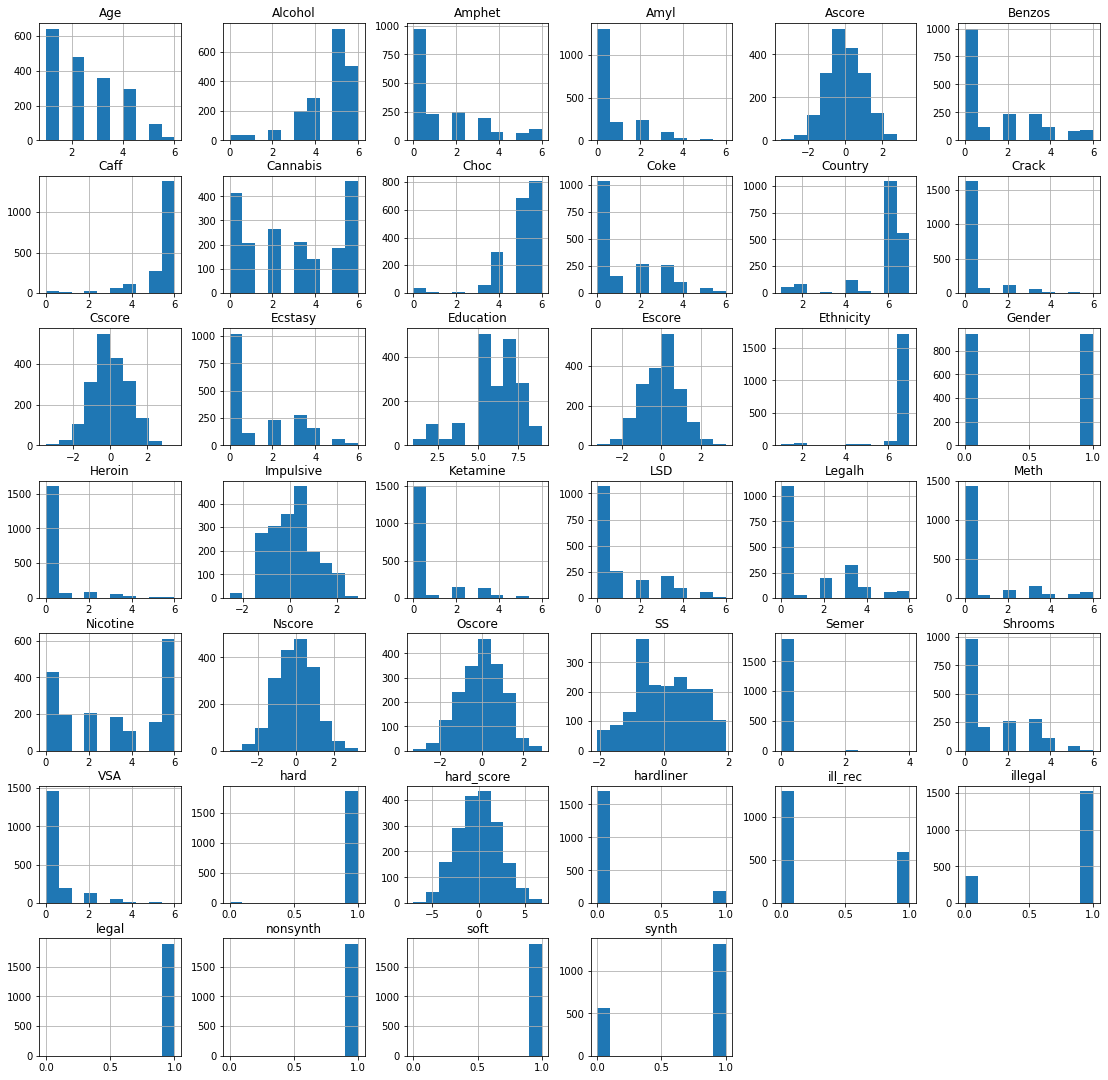

In [71]:
_ = drug_risk.hist(figsize=(19,19))

### Boxplots

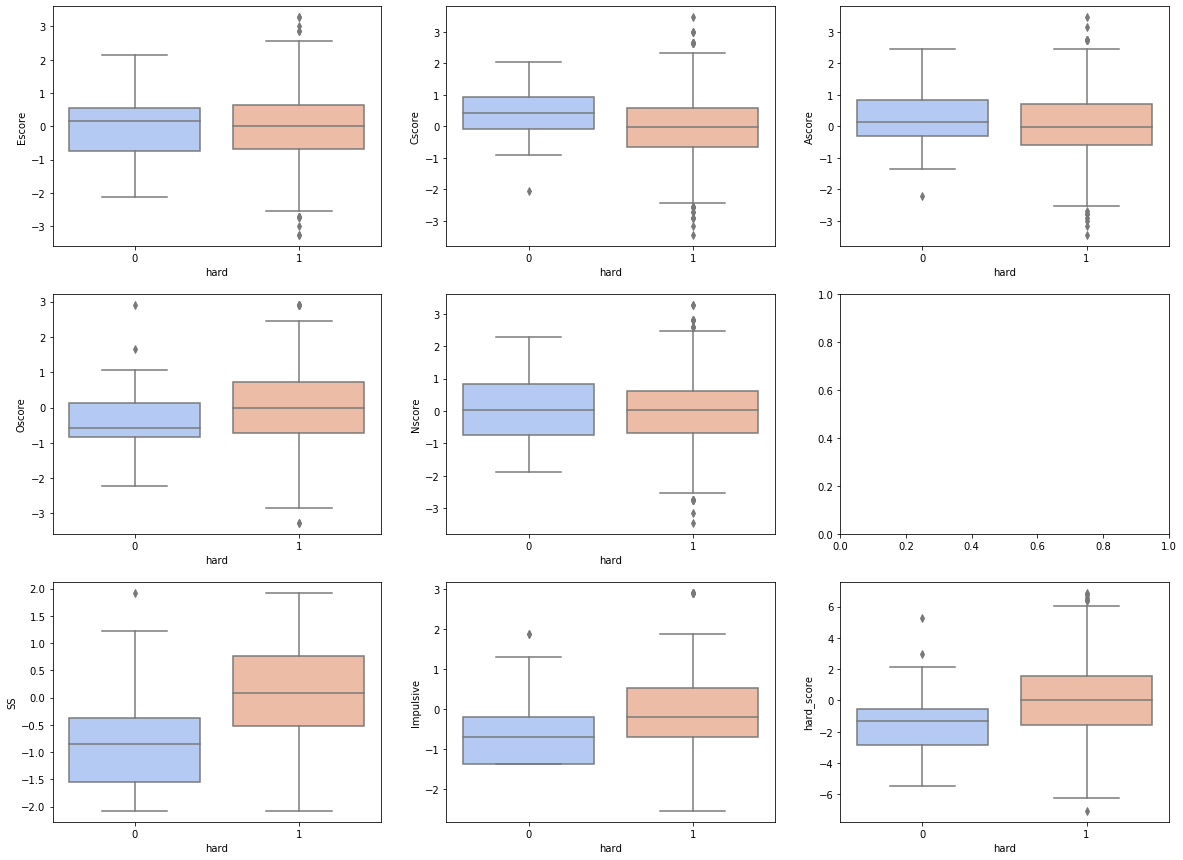

In [72]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.boxplot(x='hard', y='Oscore', palette='coolwarm', data=drug_risk, ax=axes[1][0]);
sns.boxplot(x='hard', y='Nscore', palette='coolwarm', data=drug_risk, ax=axes[1][1]);
sns.boxplot(x='hard', y='Ascore', palette='coolwarm', data=drug_risk, ax=axes[0][2]);
sns.boxplot(x='hard', y='Escore', palette='coolwarm', data=drug_risk, ax=axes[0][0]);
sns.boxplot(x='hard', y='Cscore', palette='coolwarm', data=drug_risk, ax=axes[0][1]);
sns.boxplot(x='hard', y='SS', palette='coolwarm', data=drug_risk, ax=axes[2][0]);
sns.boxplot(x='hard', y='Impulsive', palette='coolwarm', data=drug_risk, ax=axes[2][1]);
sns.boxplot(x='hard', y='hard_score', palette='coolwarm', data=drug_risk, ax=axes[2][2]);

### Heatmaps

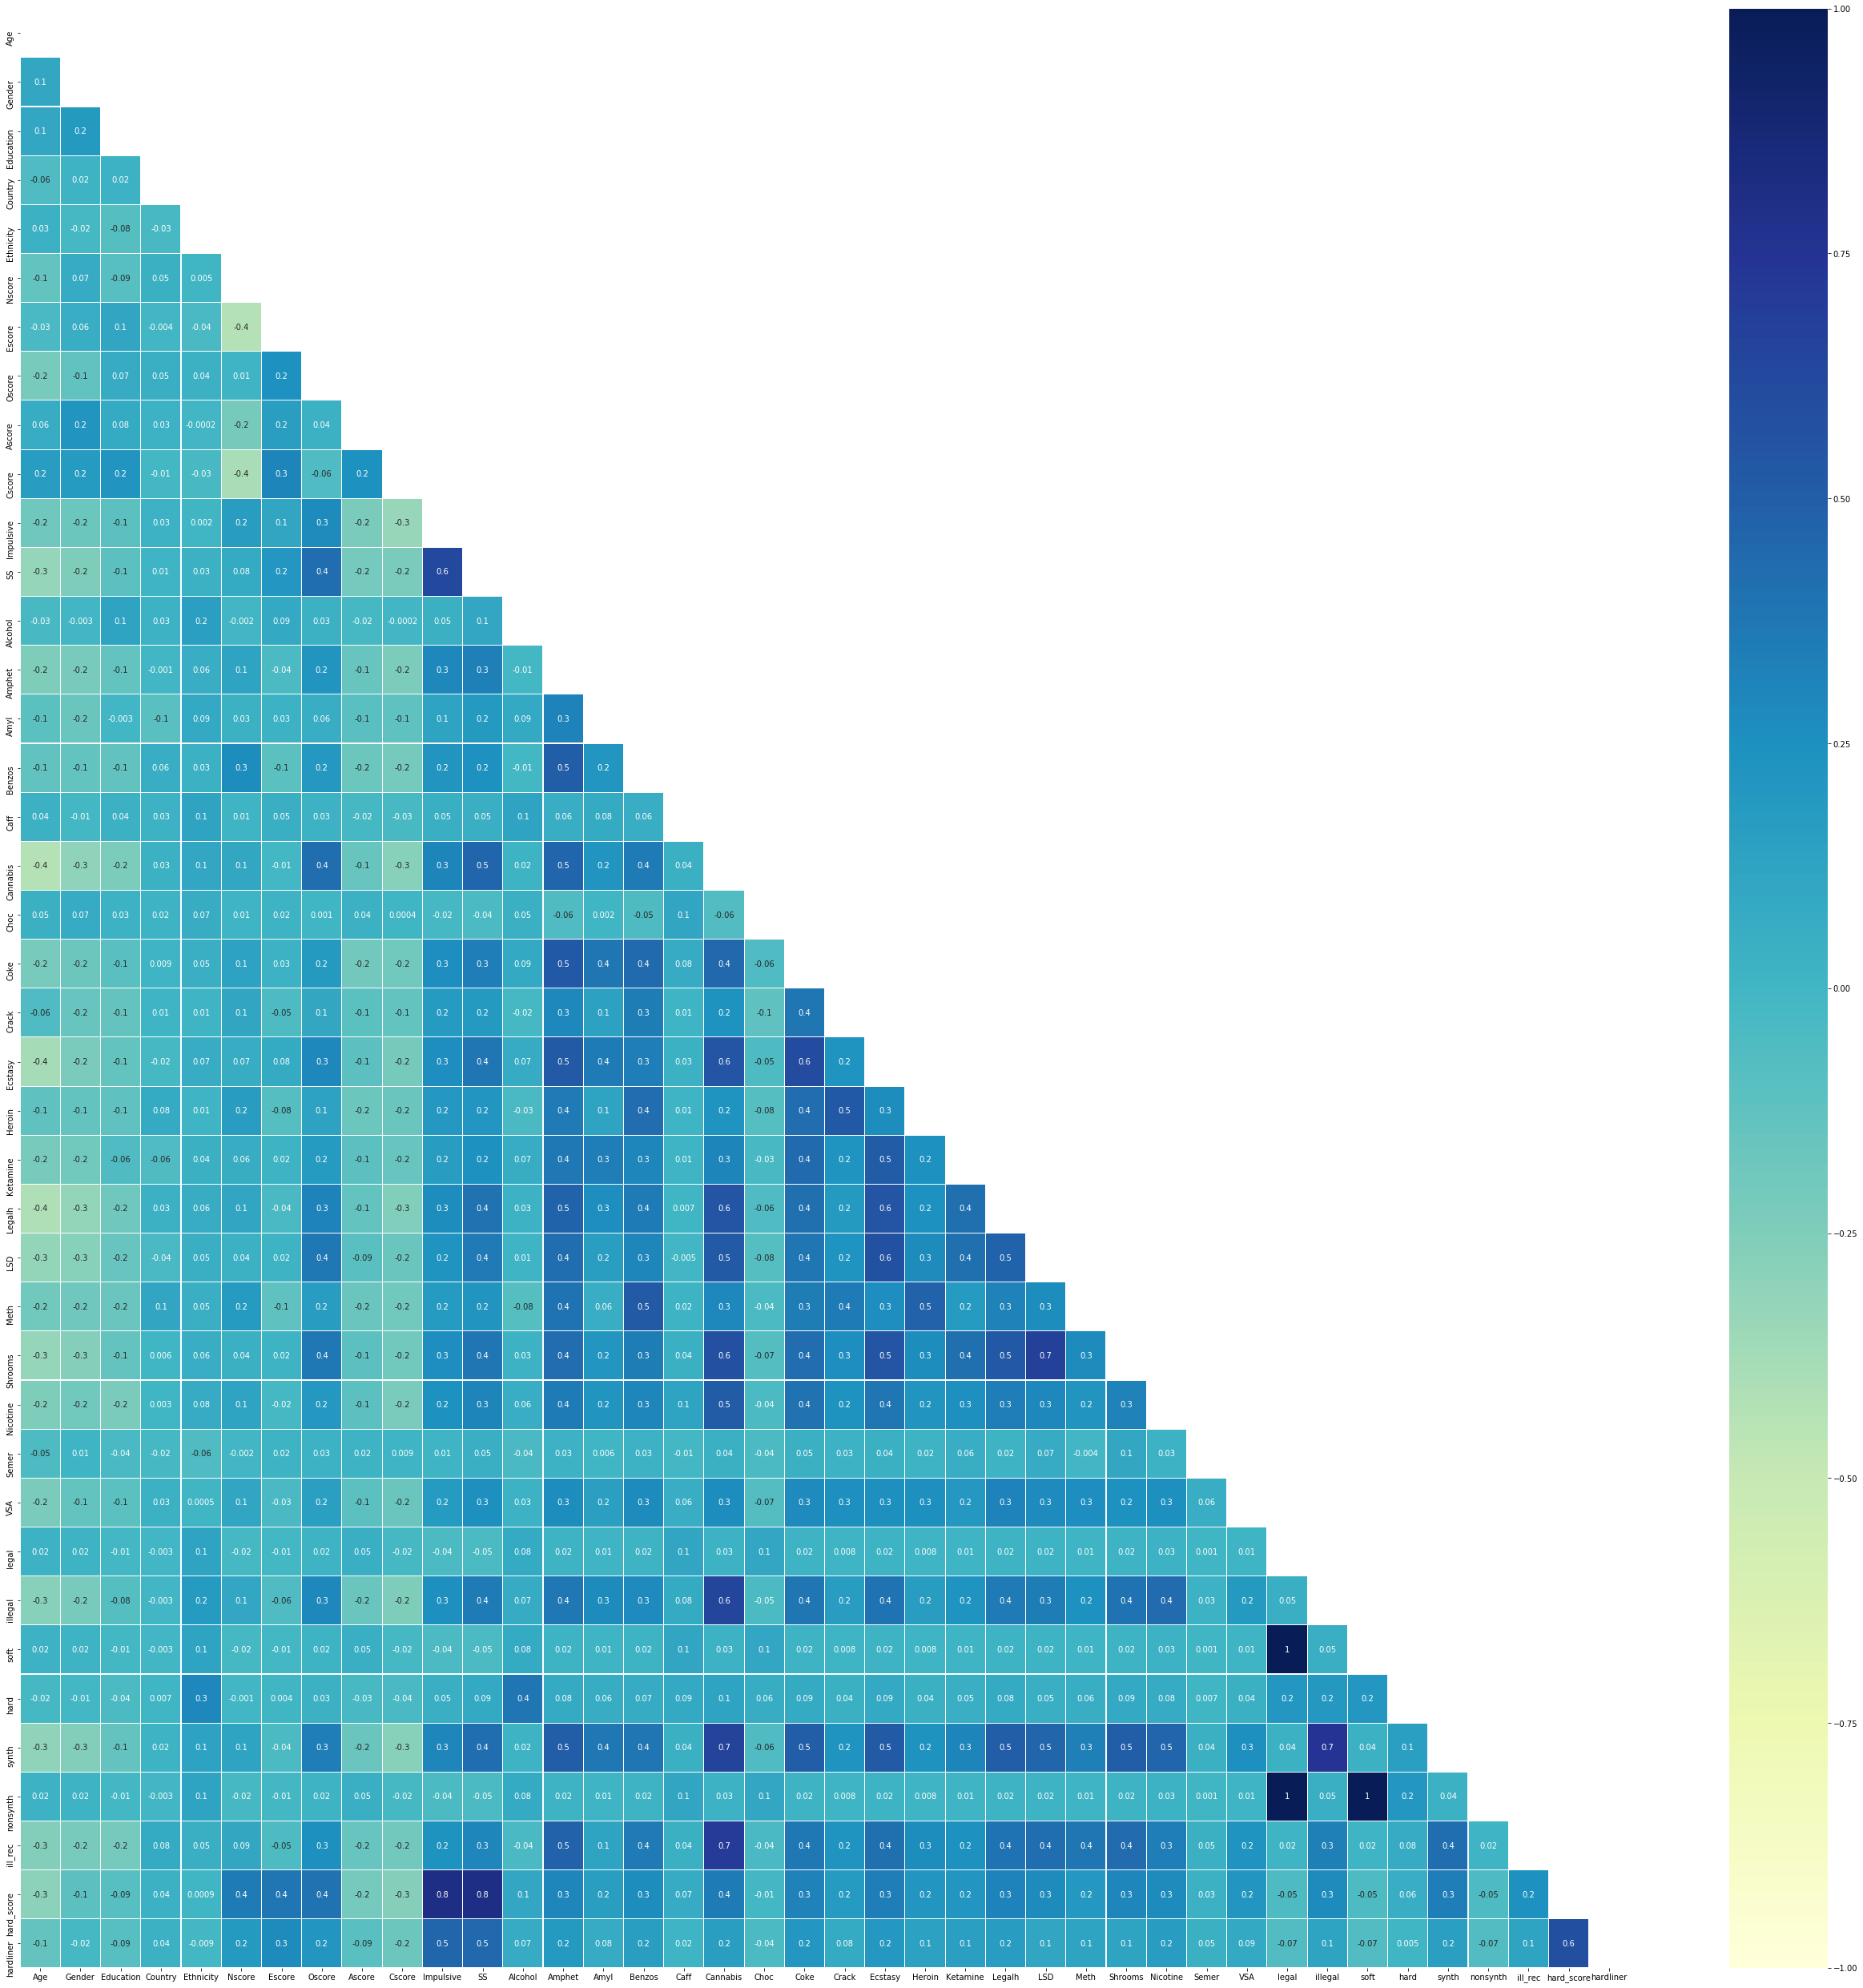

In [73]:
matrix = np.triu(drug_risk.corr())
plt.subplots(figsize=(45,45))
sns.heatmap(drug_risk.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );

In [74]:
corr_pers_drugs = pd.DataFrame(drug_risk[c1 + c2].copy())

In [75]:
corr_pers_drugs.head(2)

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,...,0,0,0,0,0,0,0,2,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,...,4,0,2,0,2,3,0,4,0,0


In [76]:
matrix = np.triu(corr_pers_drugs.corr())
matrix

array([[ 1.00000000e+00, -4.31051130e-01,  1.01765036e-02,
        -2.16963778e-01, -3.91088428e-01,  1.74398545e-01,
         7.99879096e-02, -1.88158417e-03,  1.31120462e-01,
         3.33170575e-02,  2.72220656e-01,  1.30318890e-02,
         9.55351562e-02,  1.25831036e-02,  1.39915052e-01,
         1.11434968e-01,  6.99477751e-02,  1.72684530e-01,
         6.27501403e-02,  1.13341936e-01,  3.70946070e-02,
         1.84671988e-01,  4.23859584e-02,  1.28429949e-01,
        -1.67269480e-03,  1.15085812e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.45276865e-01,
         1.57335519e-01,  3.08023536e-01,  1.14151360e-01,
         2.10130076e-01,  9.23027494e-02, -4.10951165e-02,
         3.01987861e-02, -1.03442223e-01,  5.43427105e-02,
        -1.43694232e-02,  2.03050995e-02,  3.09417431e-02,
        -5.09686303e-02,  7.88217542e-02, -7.99982754e-02,
         1.87267393e-02, -3.73833787e-02,  1.81656992e-02,
        -1.21707506e-01,  2.11053379e-02, -1.91957388e-02,
         2.29

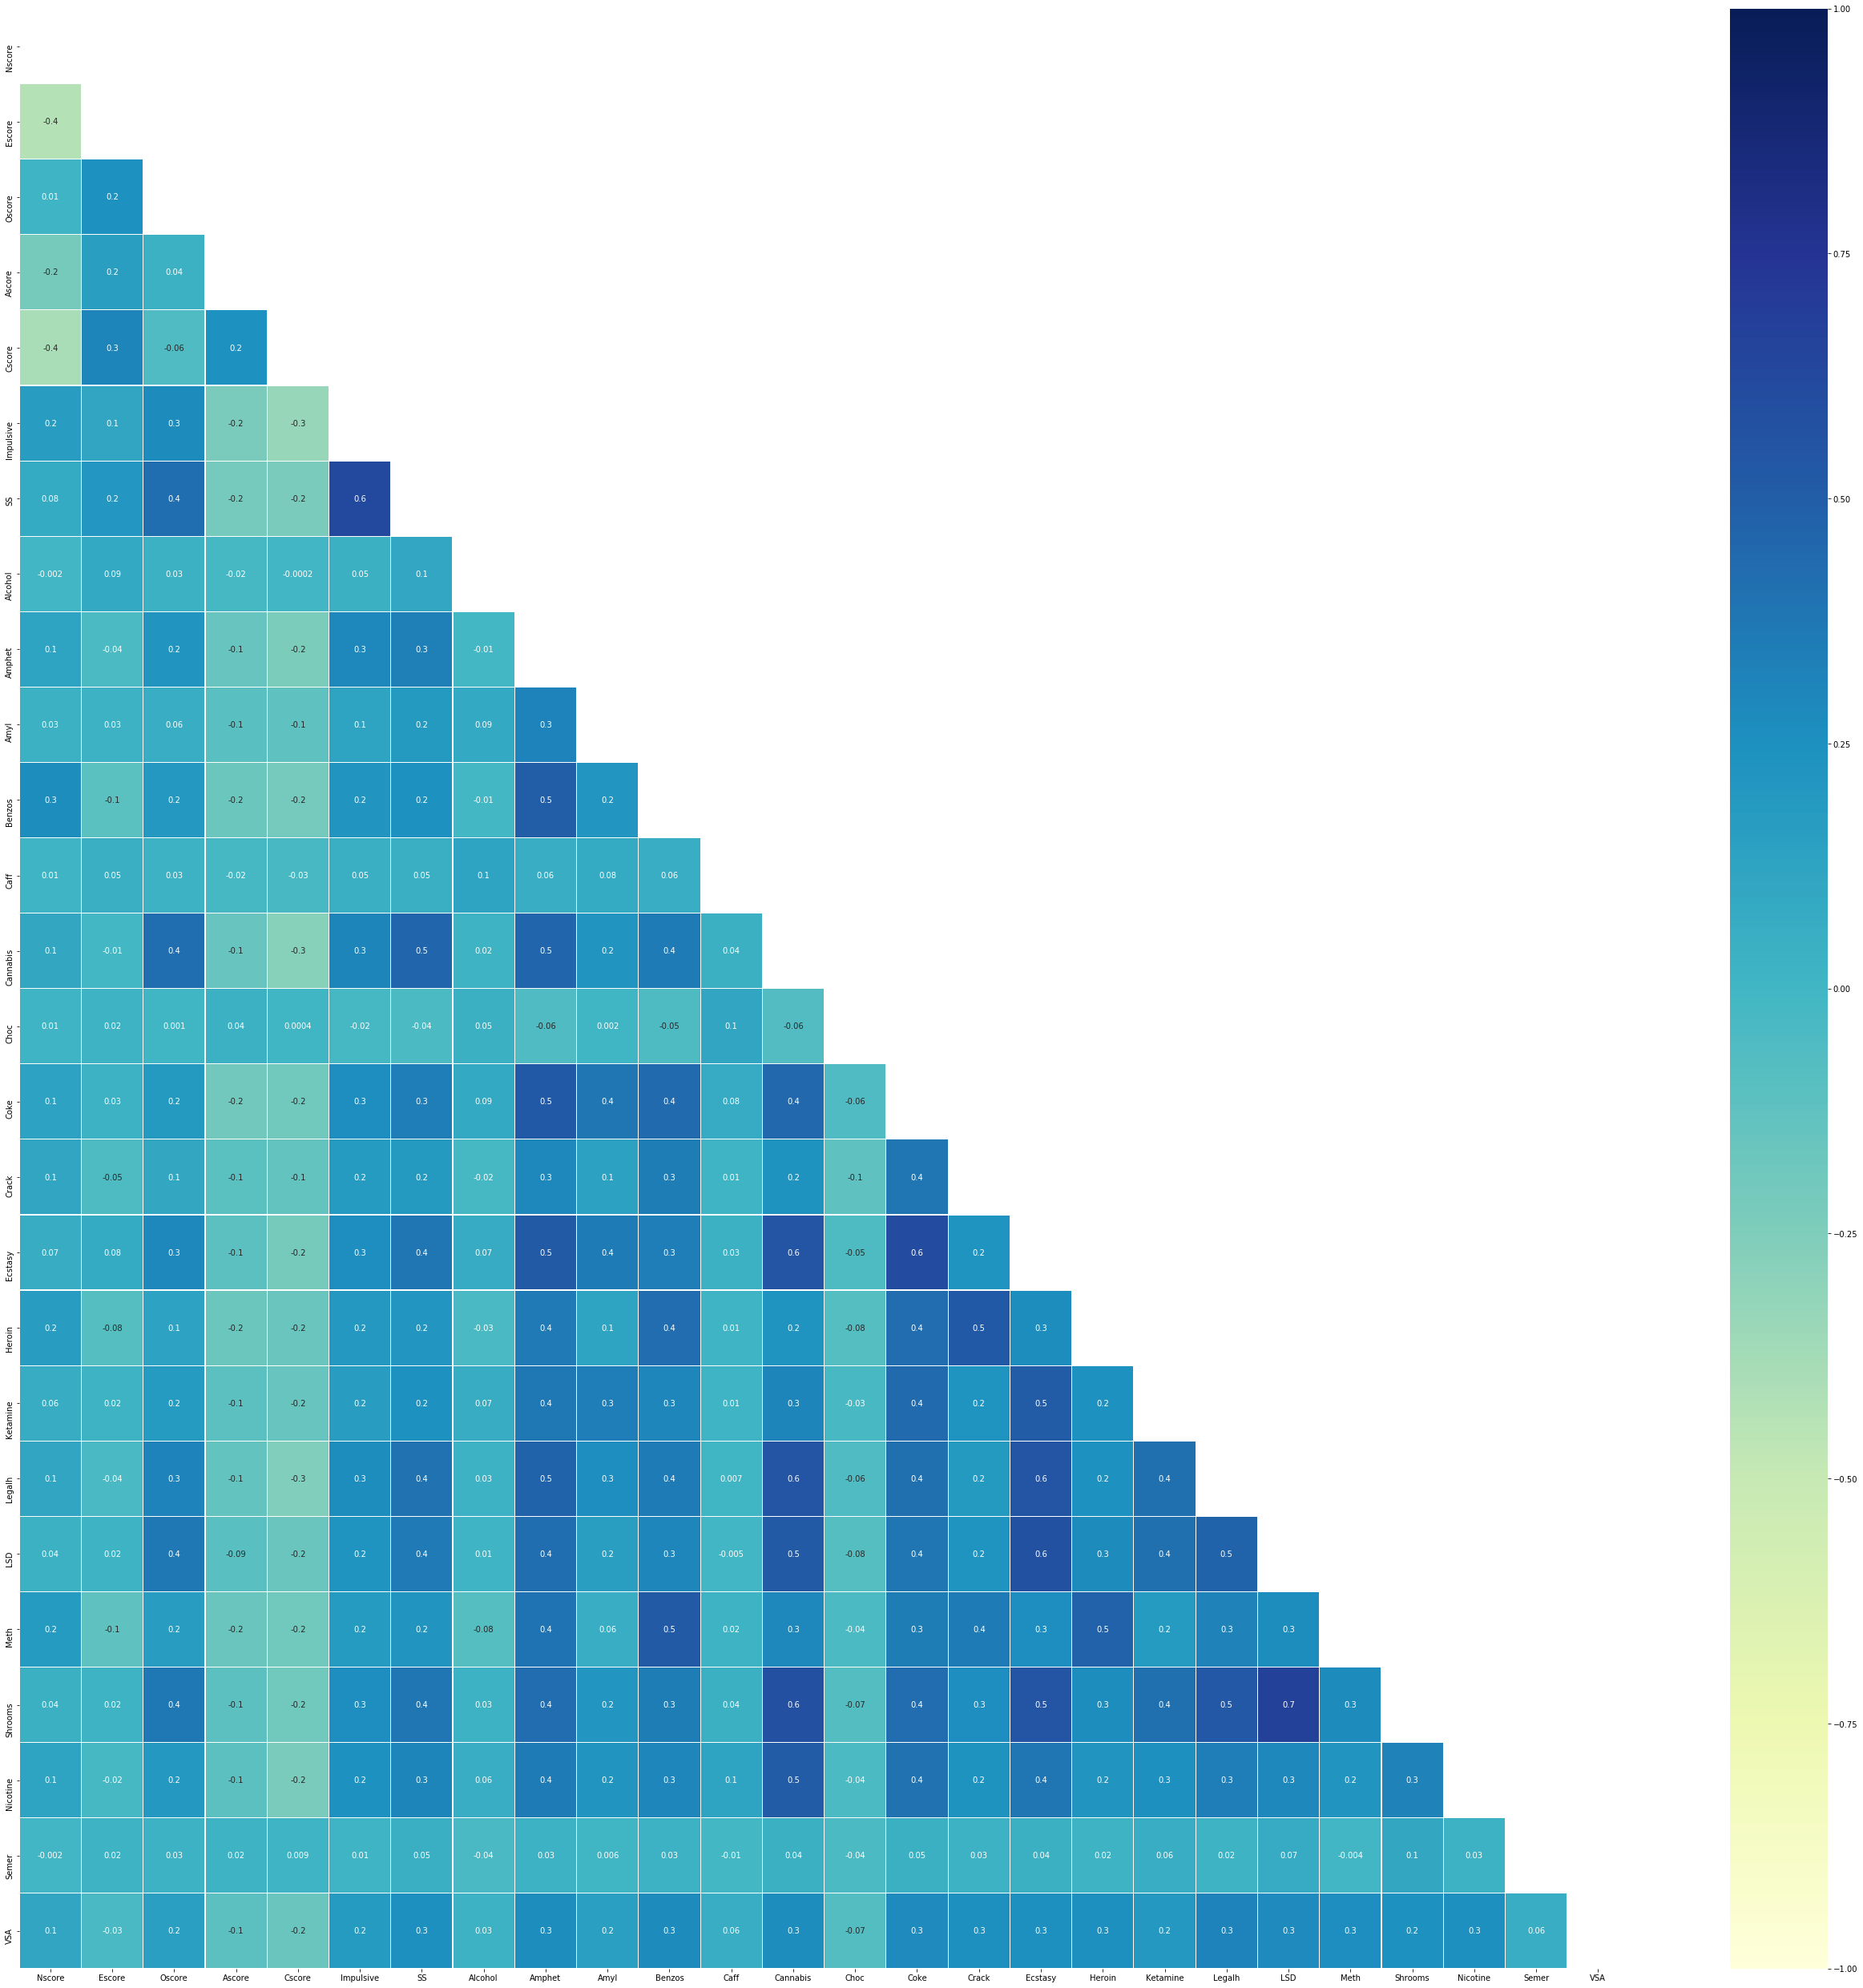

In [77]:
matrix = np.triu(corr_pers_drugs.corr())
plt.subplots(figsize=(45, 45))
sns.heatmap(corr_pers_drugs.corr(),
            mask=matrix,
            annot=True,
            fmt='.1g',
            vmin=-1,
            vmax=1,
            center=0,
            cmap='YlGnBu',
            linewidth=.1);

### Correlation Matrix Drugs

In [78]:
def corr_matrix_drugs(x):
    corr_matrix = drug_risk.corr()
    corr_m = corr_matrix[x].sort_values(ascending=False)
    print(corr_m)

#### Correlation Matrix Alcohol

In [79]:
corr_matrix_drugs('Alcohol')

Alcohol       1.000000
hard          0.387061
Ethnicity     0.152786
Education     0.129188
Caff          0.126937
SS            0.108472
hard_score    0.104370
Escore        0.092303
Coke          0.089585
Amyl          0.086749
nonsynth      0.080235
soft          0.080235
legal         0.080235
illegal       0.073981
Ecstasy       0.073585
hardliner     0.071641
Ketamine      0.065895
Nicotine      0.062264
Impulsive     0.045972
Choc          0.045885
Oscore        0.032711
Country       0.028671
Legalh        0.027828
Shrooms       0.027419
VSA           0.025353
Cannabis      0.022956
synth         0.016016
LSD           0.012123
Cscore       -0.000203
Nscore       -0.001882
Gender       -0.002537
Amphet       -0.009988
Benzos       -0.010229
Crack        -0.020121
Ascore       -0.021806
Age          -0.030284
Heroin       -0.033786
Semer        -0.036110
ill_rec      -0.038916
Meth         -0.079022
Name: Alcohol, dtype: float64


#### Correlation Matrix Benzos

In [80]:
corr_matrix_drugs('Benzos')

Benzos        1.000000
Meth          0.519292
Amphet        0.500642
Coke          0.443109
Heroin        0.427162
synth         0.383973
ill_rec       0.362043
Cannabis      0.358553
Legalh        0.357506
Crack         0.347740
Shrooms       0.344434
Ecstasy       0.342400
Nicotine      0.303475
LSD           0.302735
Ketamine      0.297018
illegal       0.287577
VSA           0.274071
Nscore        0.272221
hard_score    0.271479
SS            0.247903
Impulsive     0.223374
Amyl          0.217358
Oscore        0.201334
hardliner     0.159018
hard          0.074293
Country       0.057306
Caff          0.055515
Ethnicity     0.033305
Semer         0.026093
legal         0.018083
soft          0.018083
nonsynth      0.018083
Alcohol      -0.010229
Choc         -0.052064
Escore       -0.103442
Education    -0.125767
Age          -0.127802
Gender       -0.133717
Ascore       -0.164512
Cscore       -0.206383
Name: Benzos, dtype: float64


In [81]:
corr_matrix2 = drug_risk.query('Age > 3').corr() 
corr_m = corr_matrix2[x].sort_values(ascending=False)
print(corr_m)

VSA           1.000000
Amyl          0.392775
Amphet        0.344647
Shrooms       0.343648
synth         0.332190
LSD           0.308582
Cannabis      0.298849
ill_rec       0.279649
Coke          0.276413
Ketamine      0.274653
Legalh        0.273819
illegal       0.255295
Meth          0.248720
Heroin        0.216897
Ecstasy       0.211551
Benzos        0.185727
Crack         0.172101
SS            0.170296
Nicotine      0.148964
Nscore        0.129642
Impulsive     0.126683
hard_score    0.124818
Education     0.066274
hard          0.041921
Ethnicity     0.027656
Oscore        0.021097
Caff          0.016336
hardliner    -0.014482
Age          -0.053384
Choc         -0.076226
Country      -0.081172
Ascore       -0.088866
Alcohol      -0.129634
Escore       -0.140056
Cscore       -0.179044
Gender       -0.181996
Semer              NaN
legal              NaN
soft               NaN
nonsynth           NaN
Name: VSA, dtype: float64


### Correlation Matrix Personality Traits

#### Correlation Matrix Hardliner

In [82]:
corr_matrix_drugs('hardliner')

hardliner     1.000000
hard_score    0.591089
Impulsive     0.465570
SS            0.452097
Escore        0.281196
Oscore        0.213021
Coke          0.209621
Ecstasy       0.197998
Amphet        0.192791
Nscore        0.191130
Legalh        0.172485
Nicotine      0.167676
Benzos        0.159018
Cannabis      0.156794
synth         0.153171
Ketamine      0.149758
Heroin        0.145660
Shrooms       0.132060
Meth          0.130670
ill_rec       0.128468
illegal       0.119210
LSD           0.109444
VSA           0.088272
Crack         0.083901
Amyl          0.075199
Alcohol       0.071641
Semer         0.046518
Country       0.039038
Caff          0.015150
hard          0.004925
Ethnicity    -0.009031
Gender       -0.019252
Choc         -0.044039
nonsynth     -0.069015
legal        -0.069015
soft         -0.069015
Education    -0.089154
Ascore       -0.094507
Age          -0.144349
Cscore       -0.175517
Name: hardliner, dtype: float64


#### Correlation Matrix Sensation Seeker

In [83]:
corr_matrix_drugs('SS')

SS            1.000000
hard_score    0.808302
Impulsive     0.623120
Cannabis      0.456137
hardliner     0.452097
Oscore        0.421709
synth         0.419149
Legalh        0.405578
Ecstasy       0.388186
Shrooms       0.378285
LSD           0.365536
illegal       0.355791
Coke          0.343352
Amphet        0.331105
Nicotine      0.305635
ill_rec       0.299932
VSA           0.250599
Benzos        0.247903
Ketamine      0.243609
Meth          0.218884
Heroin        0.213684
Escore        0.210130
Amyl          0.195280
Crack         0.190201
Alcohol       0.108472
hard          0.086443
Nscore        0.079988
Caff          0.052049
Semer         0.047986
Ethnicity     0.033758
Country       0.014788
Choc         -0.039836
nonsynth     -0.046033
soft         -0.046033
legal        -0.046033
Education    -0.111399
Ascore       -0.208061
Cscore       -0.229038
Gender       -0.244277
Age          -0.327586
Name: SS, dtype: float64


In [84]:
# correlation matrix consumption frequency and personality 

In [85]:
# correlation hardliner and drugs, frequency, 

## Groupby

In [86]:
# gender
# means of drugs 

In [87]:
drugmeans_by_gender = drug_risk.groupby('Gender').mean()[list_drugs].reset_index()
drugmeans_by_gender.round(2)

,Gender,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,0,4.64,1.74,0.78,1.71,5.50,3.68,5.03,1.43,0.42,1.69,0.52,0.80,1.92,1.48,1.13,1.59,3.66,0.01,0.56
1,1,4.63,0.94,0.43,1.22,5.47,2.30,5.19,0.89,0.17,0.94,0.23,0.34,0.79,0.65,0.53,0.79,2.74,0.01,0.30


In [88]:
drugmeans_by_age = drug_risk.groupby('Age').mean()[list_drugs].reset_index()
drugmeans_by_age.round(2)

,Age,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,4.64,1.85,0.64,1.71,5.41,4.36,5.02,1.48,0.32,2.08,0.52,0.85,2.39,1.72,1.22,1.81,3.92,0.02,0.71
1,2,4.68,1.45,0.78,1.60,5.50,2.82,5.13,1.37,0.36,1.38,0.40,0.70,1.22,0.99,0.87,1.19,3.23,0.00,0.44
2,3,4.65,0.91,0.56,1.21,5.56,2.23,5.17,0.95,0.29,0.87,0.28,0.37,0.72,0.60,0.52,0.78,2.91,0.01,0.26
3,4,4.59,0.89,0.44,1.22,5.52,1.74,5.20,0.63,0.20,0.47,0.23,0.19,0.45,0.55,0.42,0.61,2.28,0.00,0.15
4,5,4.56,0.58,0.29,0.90,5.45,1.80,5.13,0.61,0.23,0.31,0.15,0.05,0.44,0.44,0.44,0.49,2.32,0.00,0.14
5,6,3.89,0.00,0.06,1.17,5.61,0.39,4.83,0.11,0.00,0.06,0.00,0.00,0.11,0.11,0.22,0.11,2.00,0.00,0.00


In [89]:
drugmeans_by_SS = drug_risk.groupby('SS').mean()[list_drugs].reset_index()
drugmeans_by_SS.round(2)

,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,-2.08,4.45,0.55,0.34,0.77,5.34,1.24,5.15,0.52,0.11,0.45,0.15,0.15,0.31,0.25,0.39,0.31,2.11,0.00,0.14
1,-1.55,4.13,0.40,0.10,0.83,5.45,0.98,5.26,0.31,0.02,0.23,0.09,0.07,0.16,0.24,0.49,0.23,2.25,0.00,0.11
2,-1.18,4.51,0.64,0.36,1.02,5.36,1.68,5.04,0.48,0.07,0.49,0.14,0.25,0.50,0.45,0.40,0.41,2.17,0.00,0.20
3,-0.85,4.54,0.69,0.34,0.87,5.43,1.77,5.05,0.65,0.14,0.59,0.14,0.18,0.54,0.44,0.46,0.56,2.57,0.00,0.15
4,-0.53,4.55,0.87,0.43,0.99,5.47,2.23,5.16,0.76,0.13,0.82,0.23,0.33,0.76,0.64,0.44,0.80,2.35,0.00,0.18
5,-0.22,4.58,1.08,0.51,1.22,5.57,2.67,5.26,0.94,0.26,1.00,0.22,0.40,1.01,0.71,0.59,0.98,2.91,0.02,0.32
6,0.08,4.69,1.35,0.79,1.74,5.42,3.32,5.13,1.31,0.36,1.43,0.32,0.63,1.44,1.13,0.82,1.37,3.37,0.02,0.40
7,0.40,4.73,1.63,0.69,1.59,5.47,3.67,5.07,1.36,0.39,1.70,0.49,0.74,1.73,1.35,1.05,1.48,3.56,0.00,0.62
8,0.77,4.77,1.97,0.96,1.95,5.49,4.10,5.03,1.36,0.35,1.94,0.46,0.96,2.24,1.72,1.07,1.77,3.90,0.01,0.58
9,1.22,4.78,2.20,0.75,2.11,5.62,4.36,5.06,2.10,0.65,2.29,0.75,0.97,2.38,1.84,1.42,1.95,4.38,0.00,0.84


In [90]:
drugmeans_by_SS = drug_risk.groupby('SS').count()[list_drugs].reset_index()
drugmeans_by_SS.round(2)

,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,-2.08,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
1,-1.55,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2,-1.18,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
3,-0.85,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
4,-0.53,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
5,-0.22,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
6,0.08,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219
7,0.40,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249
8,0.77,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
9,1.22,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210


In [91]:
#ethnivity 

drugmeans_by_ethn = drug_risk.groupby('Ethnicity').mean()[list_drugs].reset_index()
drugmeans_by_ethn.round(2)

,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,2.69,0.62,0.19,0.88,4.92,1.08,4.81,0.38,0.12,0.77,0.15,0.27,0.35,0.58,0.04,0.62,2.08,0.12,0.54
1,2,4.00,0.27,0.00,0.45,4.36,1.30,4.70,0.48,0.18,0.36,0.12,0.18,0.64,0.12,0.15,0.27,1.76,0.00,0.03
2,3,4.33,0.00,0.00,3.00,5.33,5.33,6.00,1.00,0.00,0.33,0.00,0.00,1.67,3.33,1.00,2.67,3.33,0.00,1.33
3,4,4.90,1.90,0.20,2.40,5.65,3.65,4.45,1.80,0.60,1.55,0.95,0.60,1.25,1.50,1.55,1.70,3.30,0.00,0.70
4,5,4.90,1.65,0.75,1.80,5.40,2.80,5.25,1.25,0.45,1.20,0.60,0.70,1.75,1.10,1.10,1.00,3.65,0.05,0.55
5,6,4.48,2.05,0.70,2.24,5.38,3.84,4.95,1.71,0.46,1.84,0.49,0.71,2.02,1.59,0.95,1.65,3.68,0.06,0.71
6,7,4.68,1.34,0.63,1.45,5.52,3.01,5.13,1.16,0.29,1.32,0.37,0.57,1.36,1.06,0.83,1.19,3.22,0.01,0.42


In [92]:
#country

drugmeans_by_country = drug_risk.groupby('Country').mean()[list_drugs].reset_index()
drugmeans_by_country.round(2)

,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,4.65,2.56,1.26,2.20,5.52,4.04,5.09,1.39,0.28,2.31,0.33,0.89,1.98,2.39,0.89,1.80,3.56,0.09,0.72
1,2,4.16,1.87,0.39,1.69,5.38,3.47,4.63,1.70,0.72,1.57,0.59,0.91,1.66,1.31,1.10,1.75,3.57,0.00,0.31
2,3,4.60,0.80,1.80,2.80,5.80,4.40,5.80,1.20,0.00,1.20,0.80,1.00,3.60,2.40,1.20,2.20,2.40,0.00,2.00
3,4,4.65,1.41,0.78,1.52,5.27,3.97,5.08,1.25,0.27,1.68,0.29,0.81,1.71,1.83,0.72,1.74,4.01,0.00,0.55
4,5,4.15,2.10,1.05,1.55,5.85,3.95,5.30,1.60,0.20,2.15,0.40,0.50,2.10,1.05,0.70,0.85,4.90,0.00,1.20
5,6,4.74,0.71,0.67,0.82,5.49,1.88,5.24,0.78,0.12,0.81,0.11,0.43,0.69,0.40,0.25,0.55,2.59,0.00,0.21
6,7,4.52,2.29,0.40,2.54,5.51,4.64,4.93,1.73,0.57,2.01,0.85,0.69,2.38,1.96,1.87,2.12,4.03,0.02,0.77


In [93]:
drugmeans_by_country = drug_risk.groupby('Country')[list_drugs].mean().reset_index() #???
drugmeans_by_country.round(2)

,Country,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,4.65,2.56,1.26,2.20,5.52,4.04,5.09,1.39,0.28,2.31,0.33,0.89,1.98,2.39,0.89,1.80,3.56,0.09,0.72
1,2,4.16,1.87,0.39,1.69,5.38,3.47,4.63,1.70,0.72,1.57,0.59,0.91,1.66,1.31,1.10,1.75,3.57,0.00,0.31
2,3,4.60,0.80,1.80,2.80,5.80,4.40,5.80,1.20,0.00,1.20,0.80,1.00,3.60,2.40,1.20,2.20,2.40,0.00,2.00
3,4,4.65,1.41,0.78,1.52,5.27,3.97,5.08,1.25,0.27,1.68,0.29,0.81,1.71,1.83,0.72,1.74,4.01,0.00,0.55
4,5,4.15,2.10,1.05,1.55,5.85,3.95,5.30,1.60,0.20,2.15,0.40,0.50,2.10,1.05,0.70,0.85,4.90,0.00,1.20
5,6,4.74,0.71,0.67,0.82,5.49,1.88,5.24,0.78,0.12,0.81,0.11,0.43,0.69,0.40,0.25,0.55,2.59,0.00,0.21
6,7,4.52,2.29,0.40,2.54,5.51,4.64,4.93,1.73,0.57,2.01,0.85,0.69,2.38,1.96,1.87,2.12,4.03,0.02,0.77


In [94]:
#hardliner
drugmeans_by_hardliner = drug_risk.groupby('hardliner').mean()[list_drugs].reset_index()
drugmeans_by_hardliner.round(2)

,hardliner,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,0.0,4.60,1.23,0.58,1.37,5.48,2.87,5.12,1.06,0.27,1.21,0.32,0.51,1.25,1.01,0.75,1.12,3.07,0.01,0.41
1,1.0,4.92,2.37,0.85,2.35,5.53,4.06,4.96,2.11,0.51,2.29,0.83,1.12,2.28,1.55,1.47,1.77,4.41,0.03,0.69


In [95]:
list_neoffi = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'hardliner']

In [96]:
drugmeans_by_coke = drug_risk.groupby(['Country','Coke']).mean()[list_neoffi].reset_index()
drugmeans_by_coke.round(2)

,Country,Coke,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,hardliner
0,1,0,0.05,-0.05,0.20,0.03,-0.20,0.17,0.44,0.15
1,1,1,-0.29,0.19,0.44,1.31,1.10,-0.22,-0.41,0.00
2,1,2,-0.11,0.33,0.52,0.40,-0.05,0.03,0.44,0.00
3,1,3,-0.15,0.42,0.03,-0.31,-0.60,0.70,0.82,0.25
4,1,4,-0.46,-0.30,-0.32,-0.70,0.26,0.43,-0.27,0.00
5,2,0,-0.21,-0.04,-0.35,-0.07,0.22,-0.36,-0.38,0.05
6,2,1,0.04,-0.21,-0.11,-0.29,0.13,0.30,0.30,0.11
7,2,2,0.03,-0.42,0.27,-0.08,0.19,0.15,0.30,0.11
8,2,3,0.53,-0.40,0.27,-0.20,-0.23,0.57,0.49,0.19
9,2,4,0.83,-0.64,0.07,-0.24,0.25,0.09,-0.11,0.00


In [97]:
drugmeans_by_alc = drug_risk.groupby(['Country','Alcohol']).mean()[list_neoffi].reset_index()
drugmeans_by_alc.round(2)

,Country,Alcohol,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,hardliner
0,1,1,-0.58,0.64,-0.32,0.44,0.94,-0.71,-0.53,0.00
1,1,3,-0.52,0.01,-0.02,0.01,0.10,0.33,0.39,0.11
2,1,4,-0.48,-0.00,0.12,0.34,0.11,0.10,0.40,0.00
3,1,5,0.08,0.26,0.36,-0.03,-0.35,0.46,0.55,0.29
4,1,6,0.34,0.03,0.16,-0.22,-0.36,0.21,0.33,0.07
5,2,0,-1.09,0.18,0.14,-0.07,0.47,-0.52,-1.01,0.00
6,2,1,-0.02,-0.29,-0.24,-0.22,1.03,0.31,0.23,0.00
7,2,2,0.45,-0.15,-0.49,0.29,0.34,0.06,-0.04,0.17
8,2,3,-0.30,-0.42,-0.06,-0.13,0.61,-0.34,-0.40,0.00
9,2,4,0.08,-0.16,-0.17,-0.31,0.10,-0.05,-0.08,0.08


In [98]:
drugmeans_by_thc = drug_risk.groupby(['Country','Cannabis']).mean()[list_neoffi].reset_index()
drugmeans_by_thc.round(2)

,Country,Cannabis,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,hardliner
0,1,0,-0.01,0.64,-0.72,-1.04,0.01,0.71,1.00,0.00
1,1,1,-1.03,0.07,-1.04,-0.35,0.76,0.01,0.38,0.00
2,1,2,0.32,-0.28,0.12,0.39,0.53,-0.54,-0.27,0.00
3,1,3,0.08,-0.20,0.09,-0.69,-0.43,0.28,0.53,0.11
4,1,4,-0.47,0.82,0.12,0.11,-0.40,0.85,0.79,0.44
5,1,5,-0.01,-0.14,0.41,0.58,-0.14,-0.00,0.27,0.00
6,1,6,0.03,0.10,0.48,0.07,-0.33,0.41,0.40,0.13
7,2,0,-0.42,0.02,-1.08,0.37,0.68,-0.81,-0.99,0.00
8,2,1,-0.07,-0.06,-0.65,0.04,0.74,-0.57,-0.38,0.00
9,2,2,0.41,-0.16,-0.17,-0.58,0.25,-0.09,-0.46,0.17


In [99]:
persmeans_by_benzo = drug_risk.groupby(['Country','Benzos']).mean()[list_neoffi].reset_index()
persmeans_by_benzo.round(2)

,Country,Benzos,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,hardliner
0,1,0,-0.40,0.42,0.09,-0.18,-0.33,0.52,0.87,0.32
1,1,1,0.74,-0.70,1.24,0.94,0.42,0.53,0.77,0.00
2,1,2,-0.19,-0.02,0.25,0.13,-0.11,0.30,0.03,0.00
3,1,3,0.50,-0.57,0.19,-0.05,-0.77,0.09,0.78,0.12
4,1,4,-0.07,0.49,0.62,0.12,0.26,-0.07,0.11,0.00
5,1,5,0.17,-0.41,-0.58,-0.11,-0.29,0.41,-0.31,0.00
6,1,6,0.10,0.29,0.05,0.47,1.07,-0.26,-0.31,0.00
7,2,0,-0.20,0.03,-0.02,-0.10,0.20,-0.32,-0.15,0.04
8,2,1,0.53,-0.05,-0.73,0.16,-1.32,1.54,0.60,0.33
9,2,2,-0.07,-0.82,-0.10,-0.39,0.32,0.51,0.34,0.00


In [100]:
persmeans_by_benzo = drug_risk.groupby(['Education','Benzos']).count()[list_neoffi].reset_index()
persmeans_by_benzo.round(2)

,Education,Benzos,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,hardliner
0,1,0,9,9,9,9,9,9,9,9
1,1,1,3,3,3,3,3,3,3,3
2,1,2,8,8,8,8,8,8,8,8
3,1,3,5,5,5,5,5,5,5,5
4,1,4,1,1,1,1,1,1,1,1
5,1,6,2,2,2,2,2,2,2,2
6,2,0,55,55,55,55,55,55,55,55
7,2,1,5,5,5,5,5,5,5,5
8,2,2,12,12,12,12,12,12,12,12
9,2,3,14,14,14,14,14,14,14,14


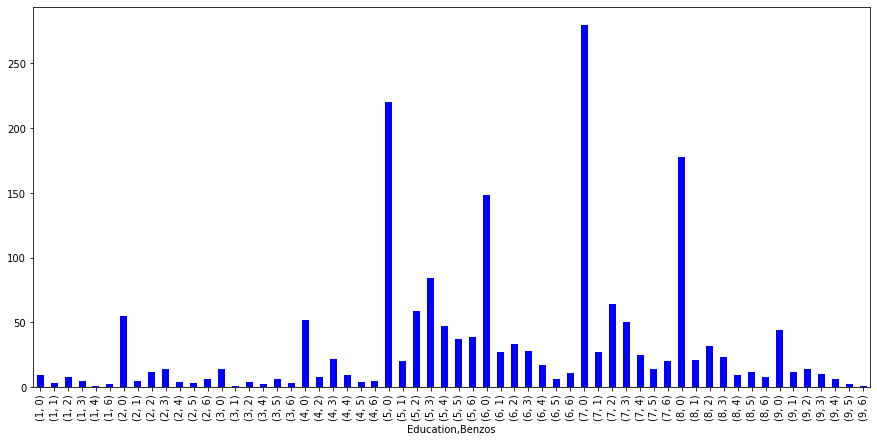

In [101]:
fig, ax = plt.subplots(figsize=(15,7))
group_gender = drug_risk.groupby(['Education','Benzos'])['Alcohol'].count()
group_gender.plot(kind="bar", color='blue')

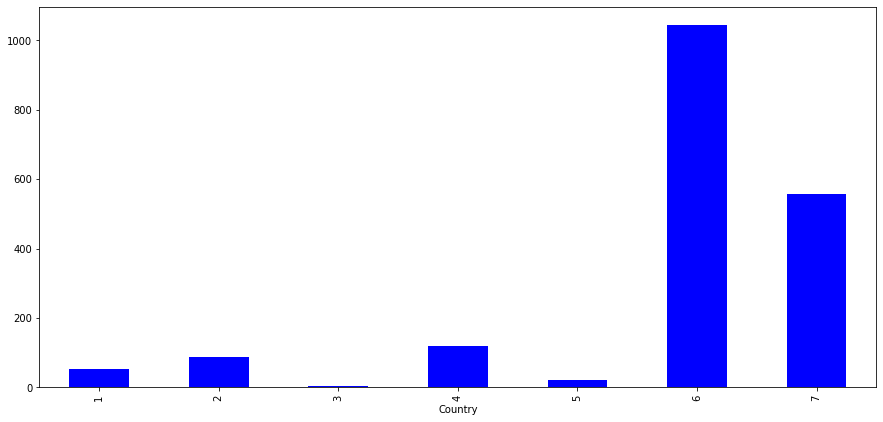

In [102]:
fig, ax = plt.subplots(figsize=(15,7))
group_gender = drug_risk.groupby(['Country'])['Meth'].count()
group_gender.plot(kind="bar", color='blue')

# Predictive Modeling

## Target Variable: Benzos

### Baseline Model for Benzodiazapine Users Prediction

Predicting benzodiazapine consumption from data 

In [103]:
cat_features_min = c2 + c3 
cat_features_min.remove('Benzos')

In [104]:
num_features_min = c1

In [105]:
# Define predictors and target variable
X_min = drug_risk_min.drop('Benzos', axis=1)
y_min = drug_risk['Benzos']
print(X_min.shape)
print(y_min.shape)

(1885, 36)
(1885,)


In [106]:
# Split into train and test set
X_min_train, X_min_test, y_min_train, y_min_test = train_test_split(X_min, y_min, test_size=0.3, random_state=42)

In [107]:
# Pipline for numerical features
cont_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor = ColumnTransformer([
    ('num', cont_pipeline, num_features_min),
    ('cat', cat_pipeline, cat_features_min)
])

<class 'xgboost.sklearn.XGBClassifier'>
Confusion Matrix :
[[648   8  16  14   3   1   3]
 [ 59  13  11   3   0   1   0]
 [101  10  34  22   6   2   2]
 [ 82   3  23  26  10   5  11]
 [ 31   1   8  17   6   4  10]
 [ 26   1   6   7   5   8   8]
 [ 14   4  10  12   9   3  12]]
Accuracy Score : 0.5663381349507203
Report : 
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       693
           1       0.33      0.15      0.20        87
           2       0.31      0.19      0.24       177
           3       0.26      0.16      0.20       160
           4       0.15      0.08      0.10        77
           5       0.33      0.13      0.19        61
           6       0.26      0.19      0.22        64

    accuracy                           0.57      1319
   macro avg       0.33      0.26      0.28      1319
weighted avg       0.49      0.57      0.51      1319



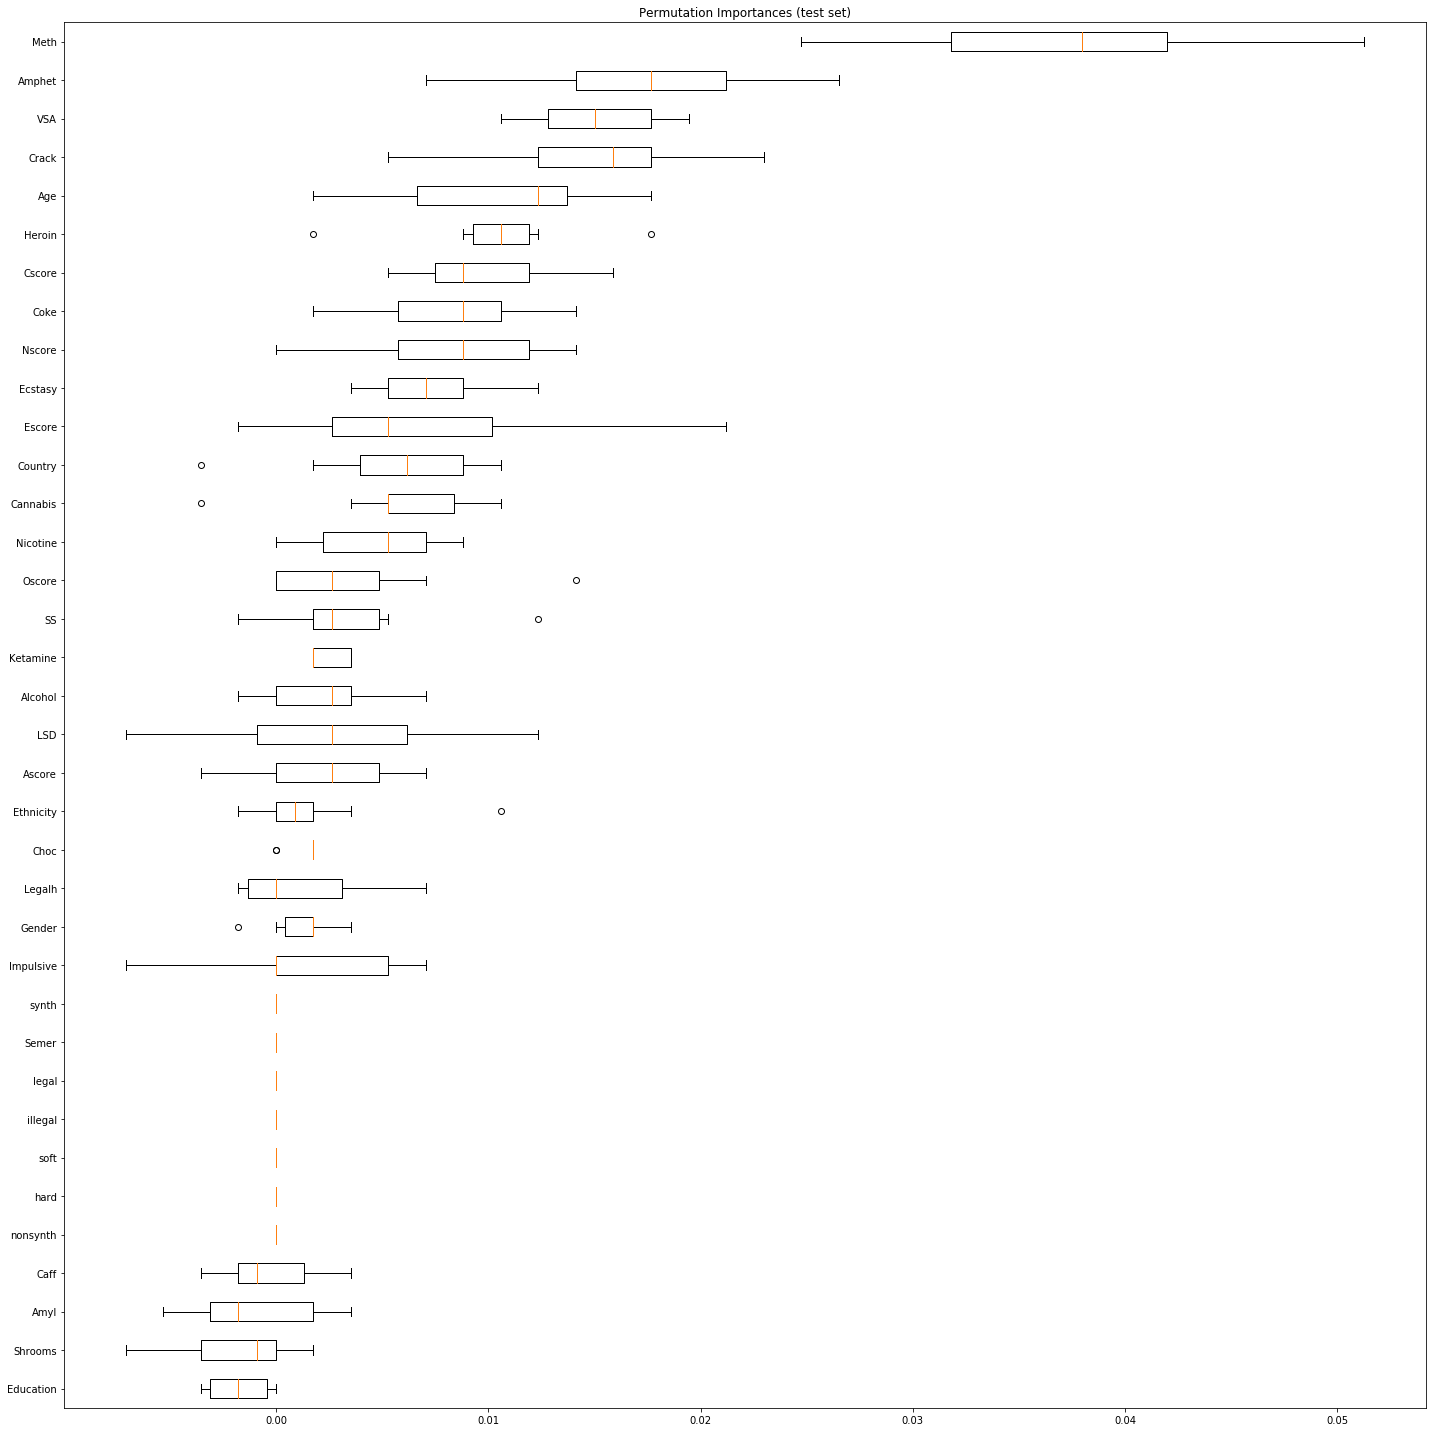

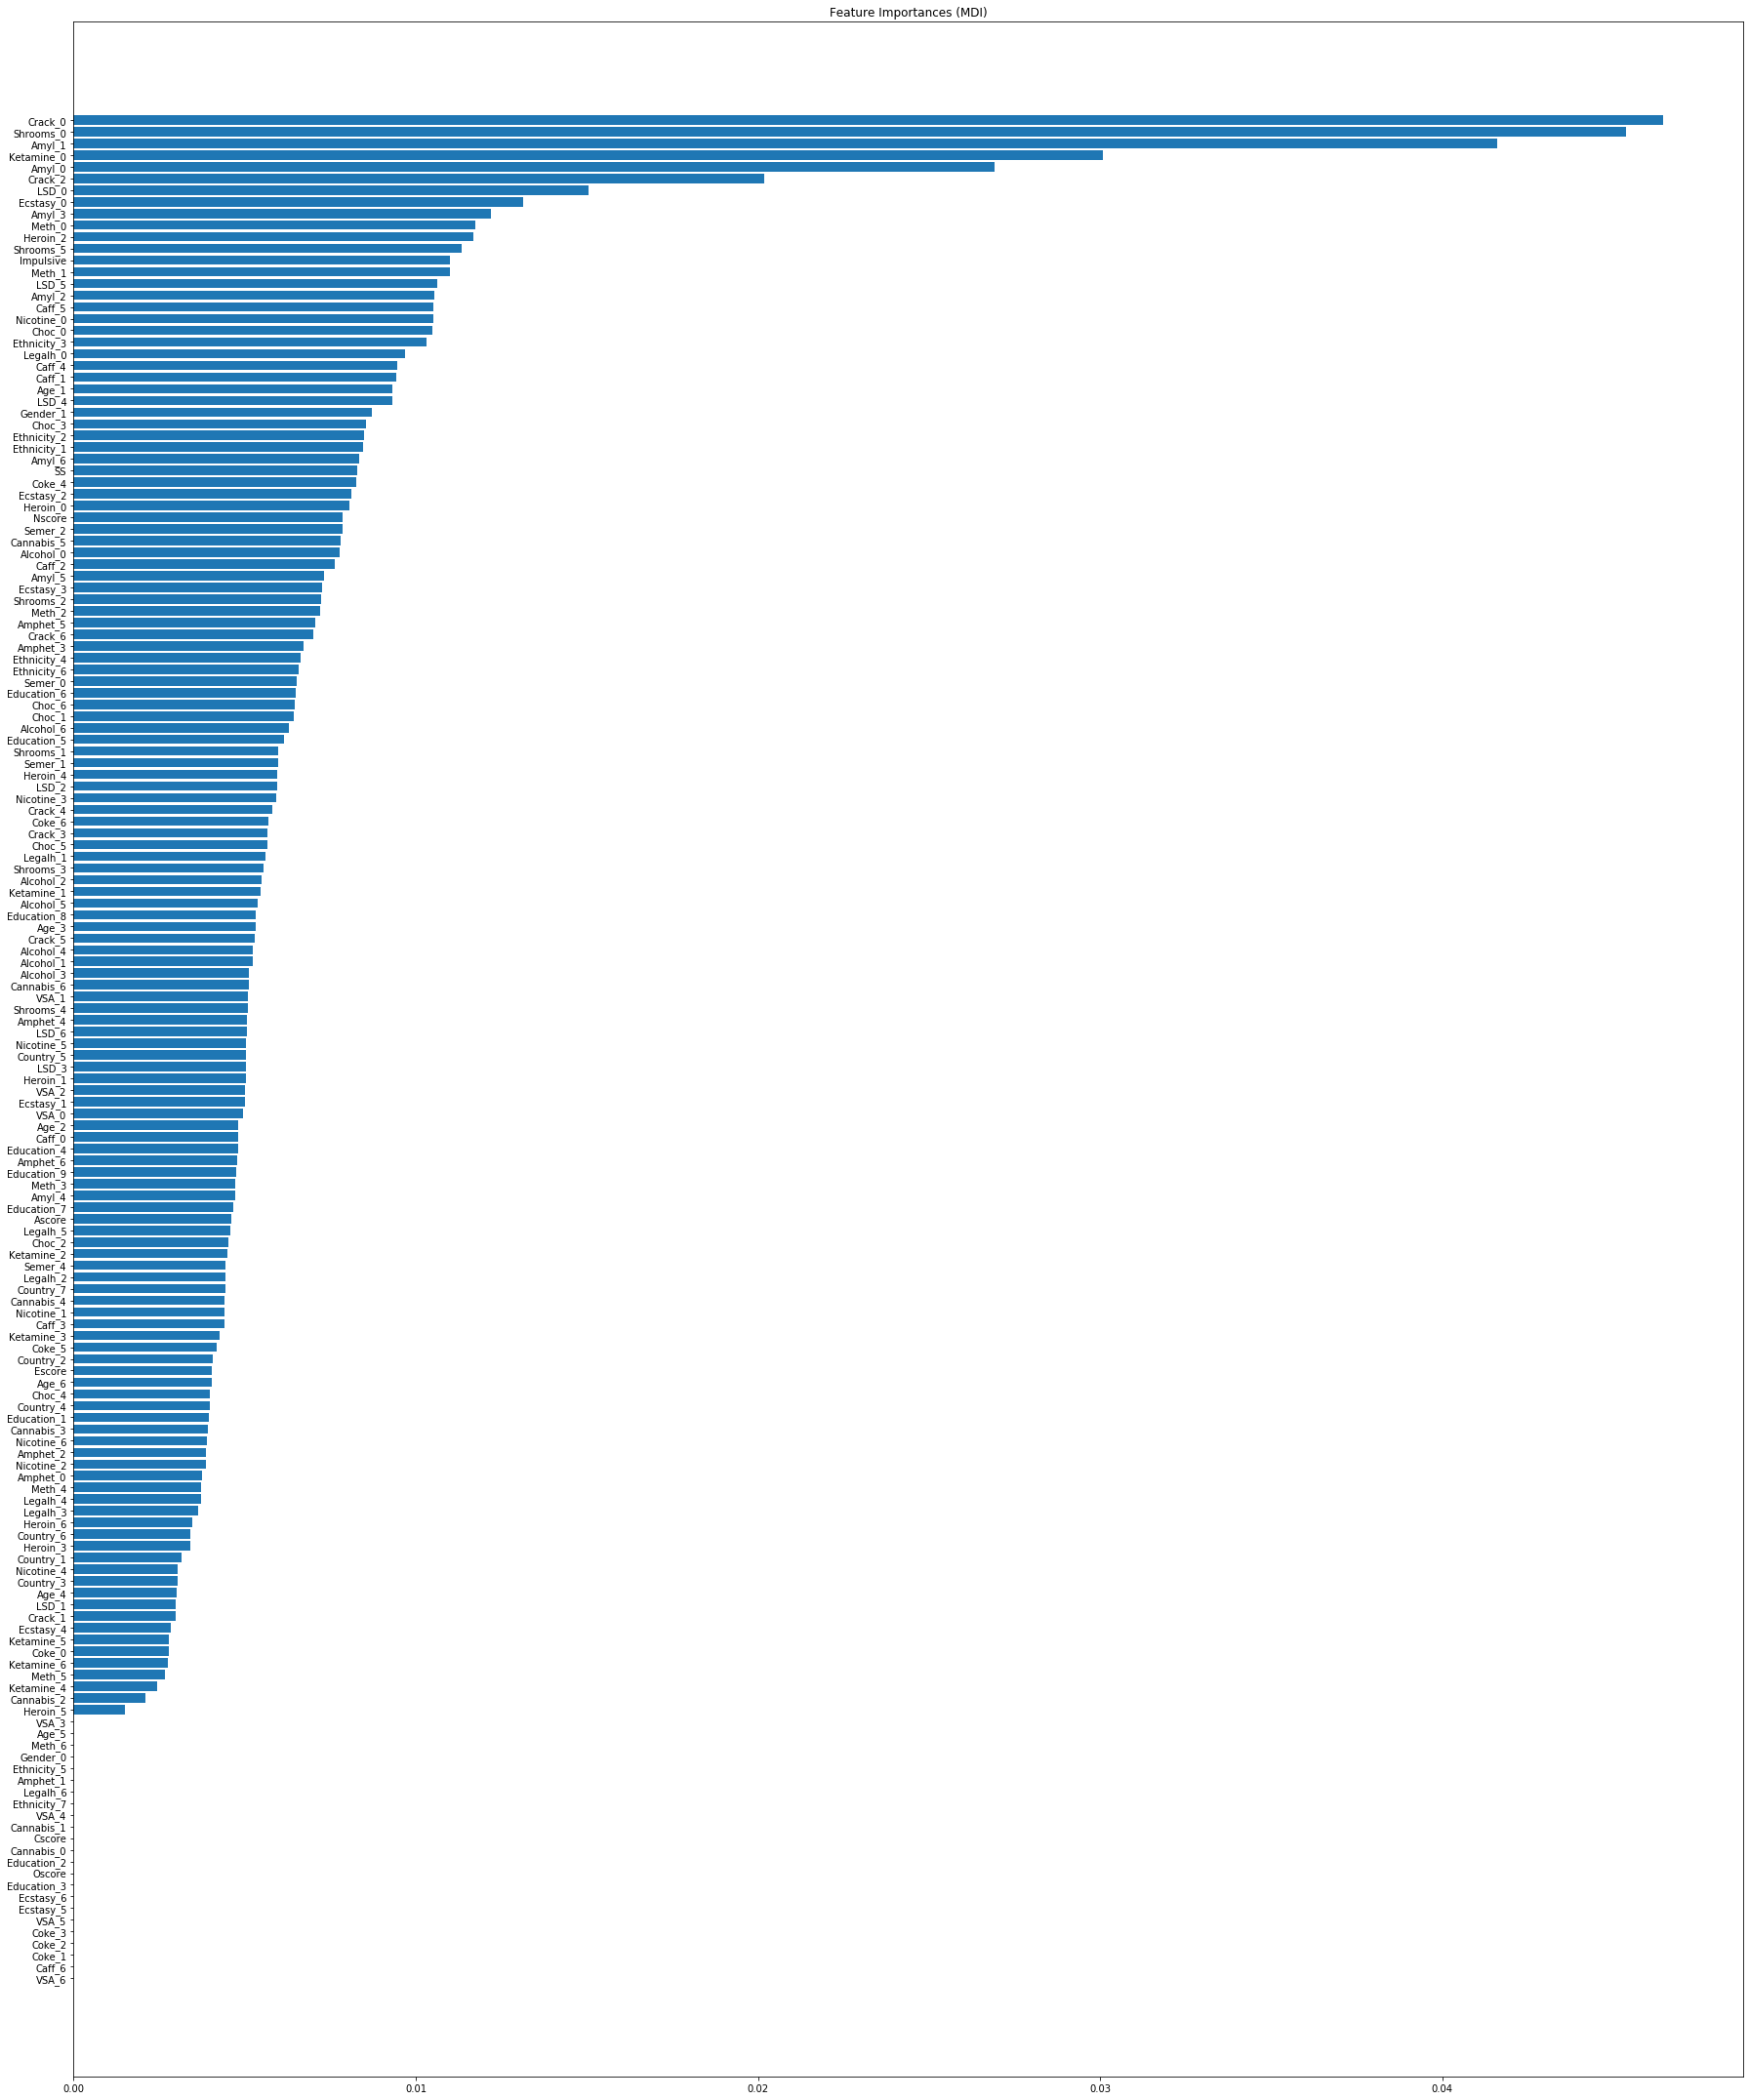

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Confusion Matrix :
[[535  81  31  20  10   9   7]
 [ 28  40  14   3   1   0   1]
 [ 87  18  25  17   4  13  13]
 [ 64   8  20  23  10  15  20]
 [ 28   3   9   8   5  10  14]
 [ 16   2   3  11   7  12  10]
 [ 12   2   9   5   5  11  20]]
Accuracy Score : 0.5003790750568613
Report : 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       693
           1       0.26      0.46      0.33        87
           2       0.23      0.14      0.17       177
           3       0.26      0.14      0.19       160
           4       0.12      0.06      0.08        77
           5       0.17      0.20      0.18        61
           6       0.24      0.31      0.27        64

    accuracy                           0.50      1319
   macro avg       0.28      0.30      0.28      1319
weighted avg       0.47      0.50      0.48      1319



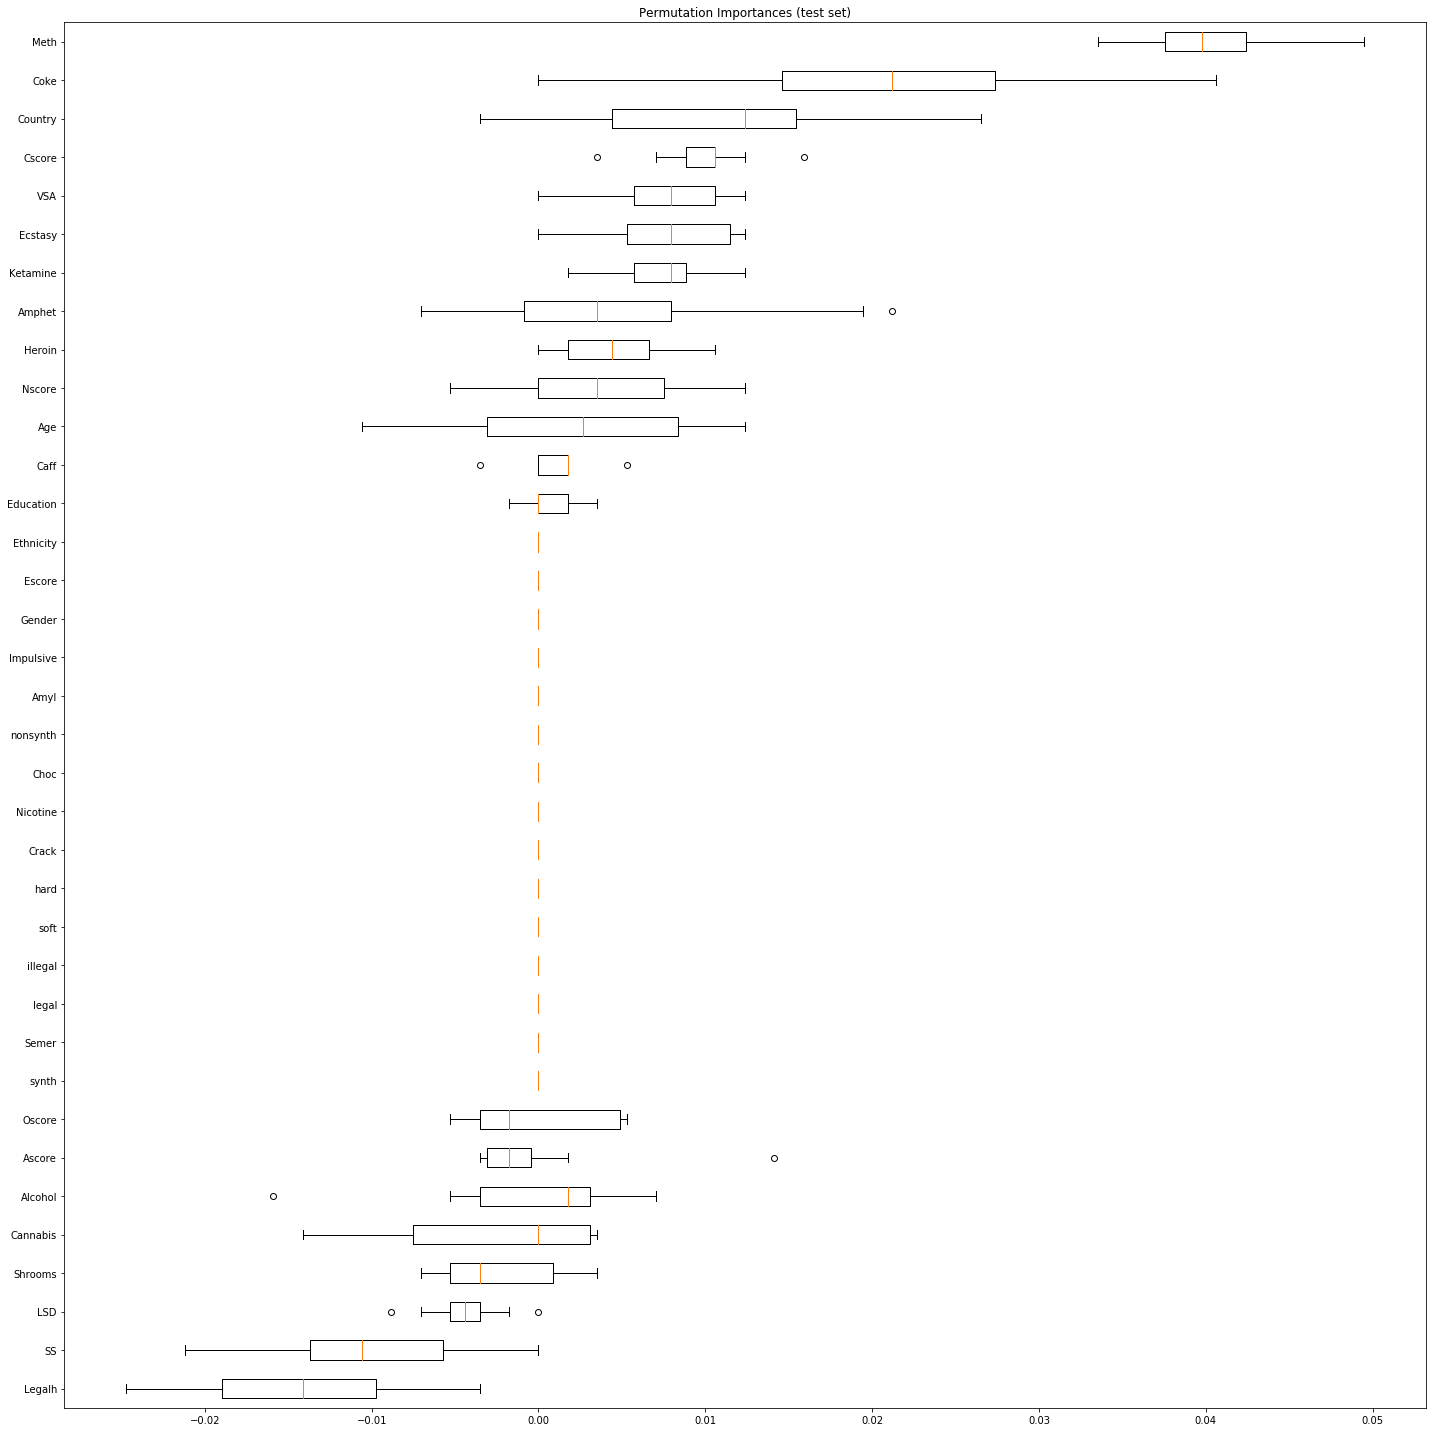

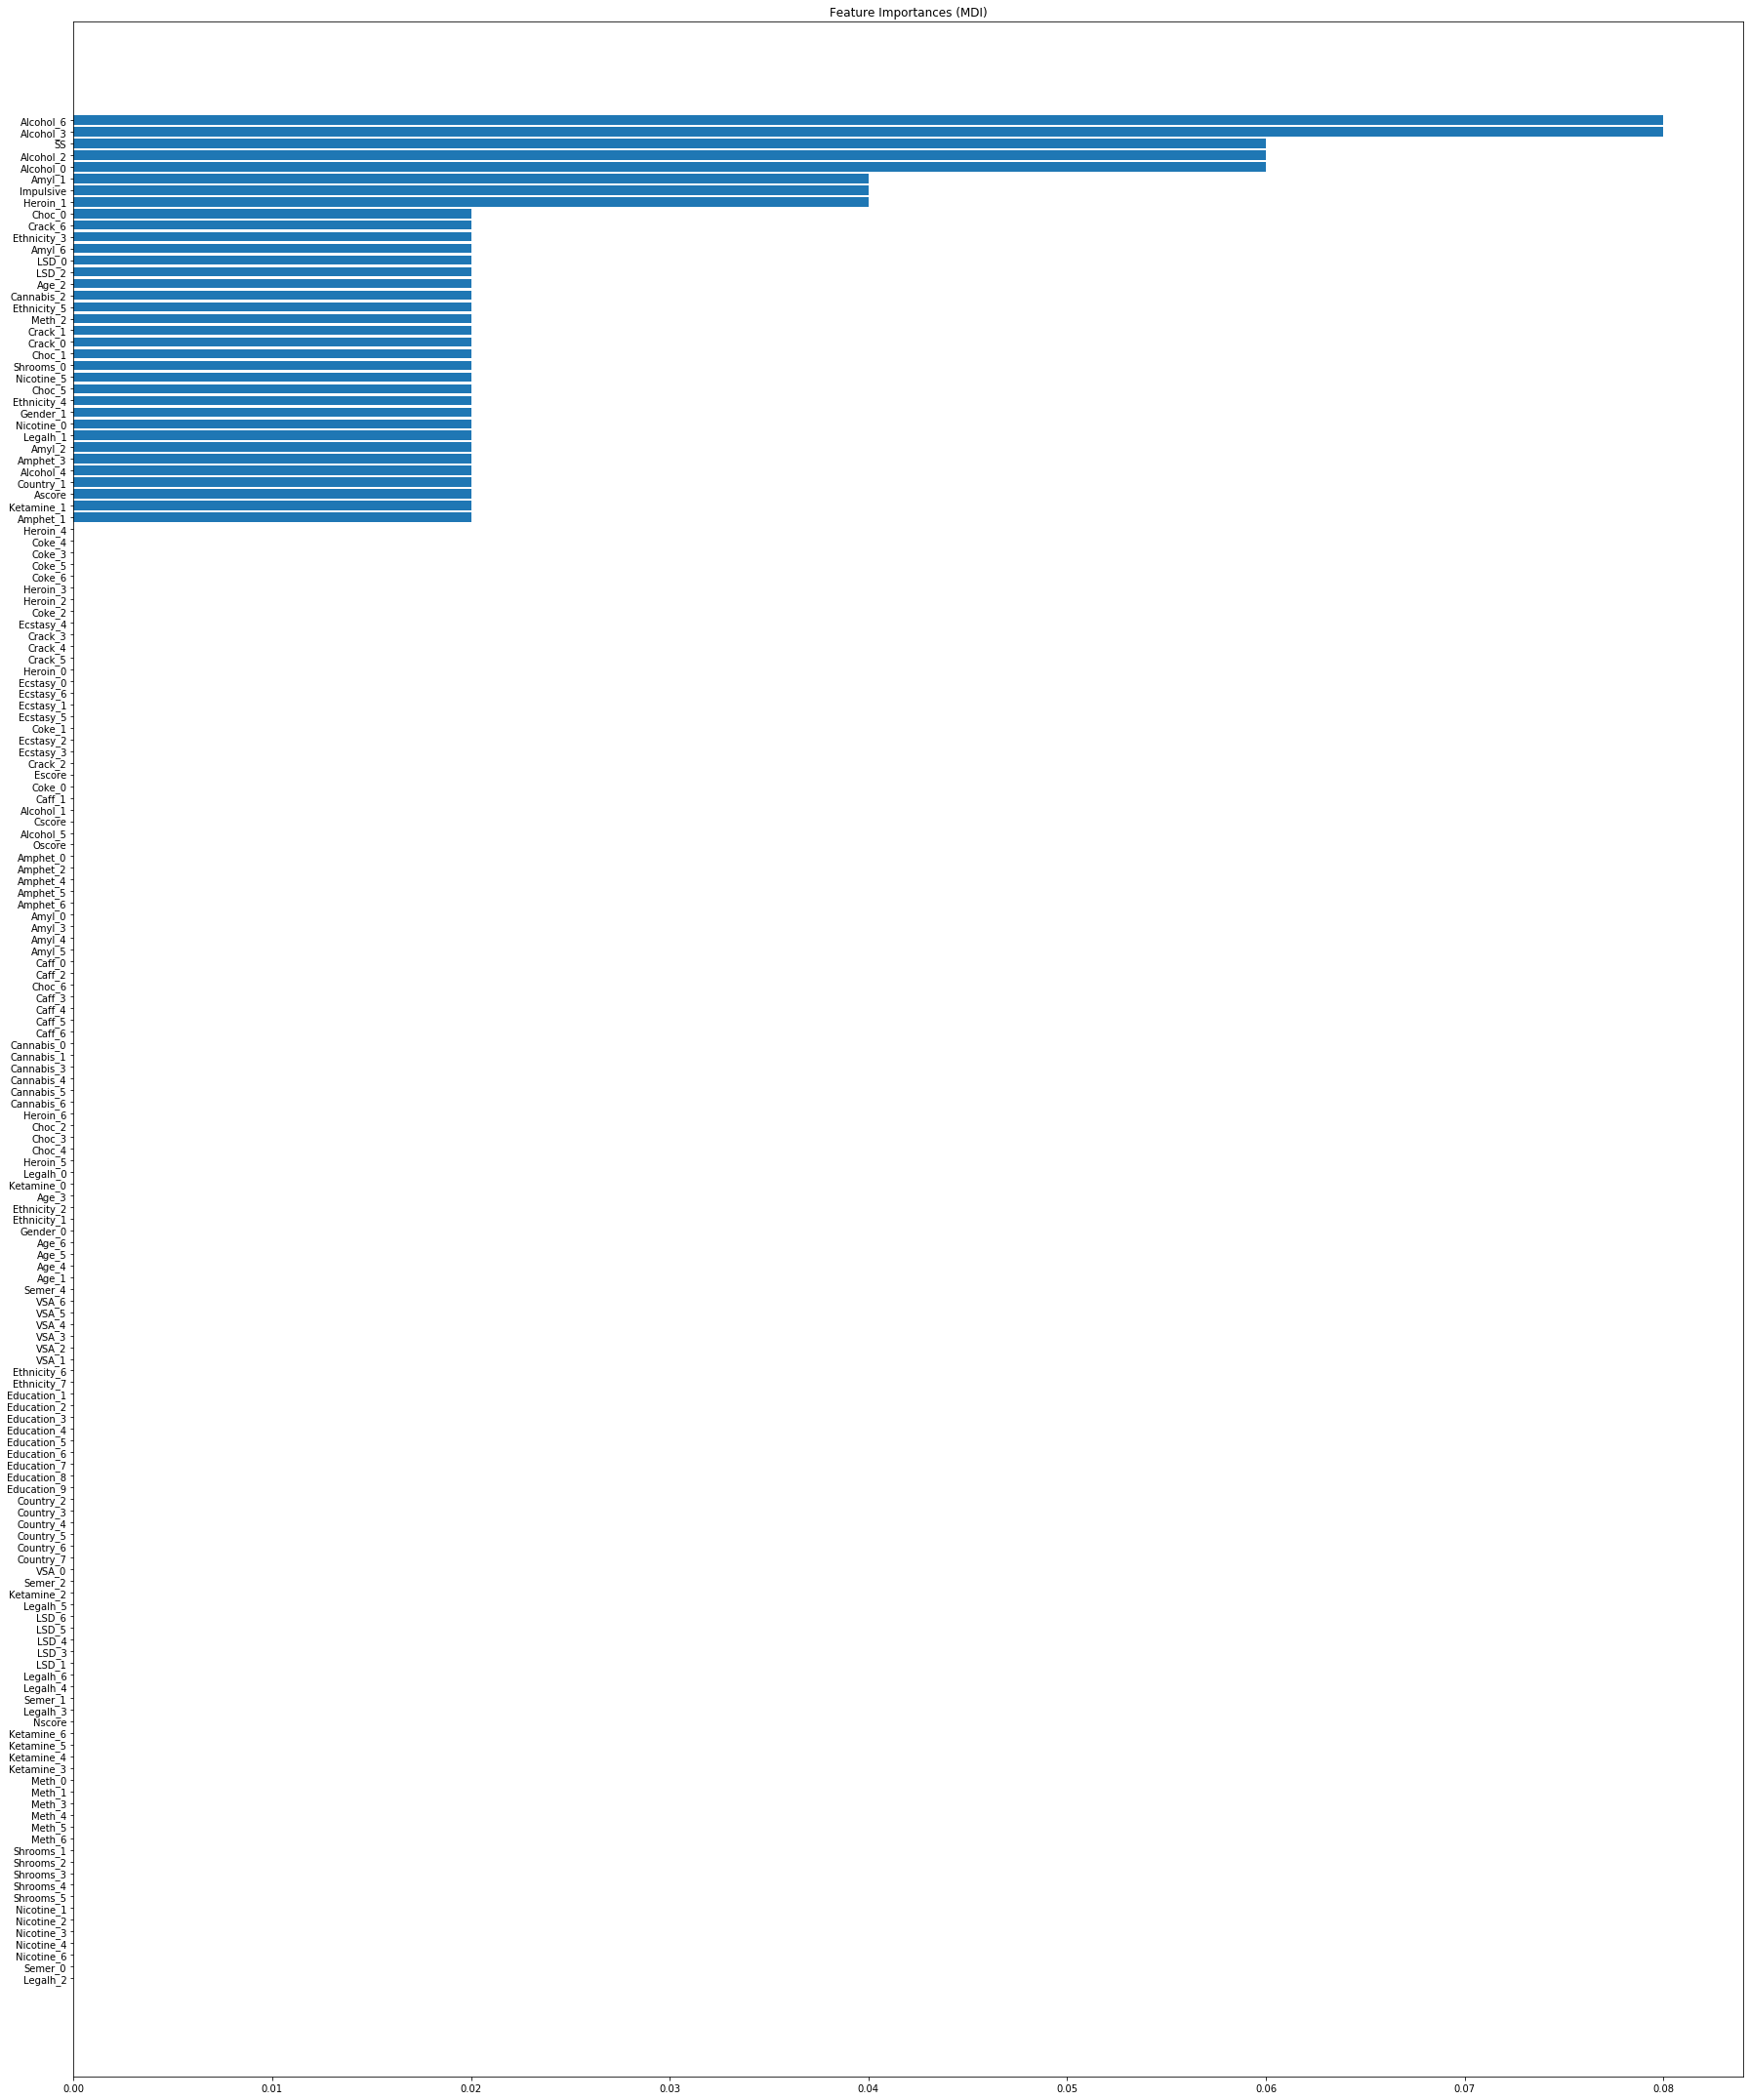

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Confusion Matrix :
[[674   5  10   4   0   0   0]
 [ 68   9   9   1   0   0   0]
 [112   7  28  26   4   0   0]
 [ 96   3  17  32   7   1   4]
 [ 40   1  11  14   5   0   6]
 [ 34   0   8  15   1   2   1]
 [ 22   1  15  19   2   1   4]]
Accuracy Score : 0.5716451857467779
Report : 
              precision    recall  f1-score   support

           0       0.64      0.97      0.78       693
           1       0.35      0.10      0.16        87
           2       0.29      0.16      0.20       177
           3       0.29      0.20      0.24       160
           4       0.26      0.06      0.10        77
           5       0.50      0.03      0.06        61
           6       0.27      0.06      0.10        64

    accuracy                           0.57      1319
   macro avg       0.37      0.23      0.23      1319
weighted avg       0.49      0.57      0.49      1319



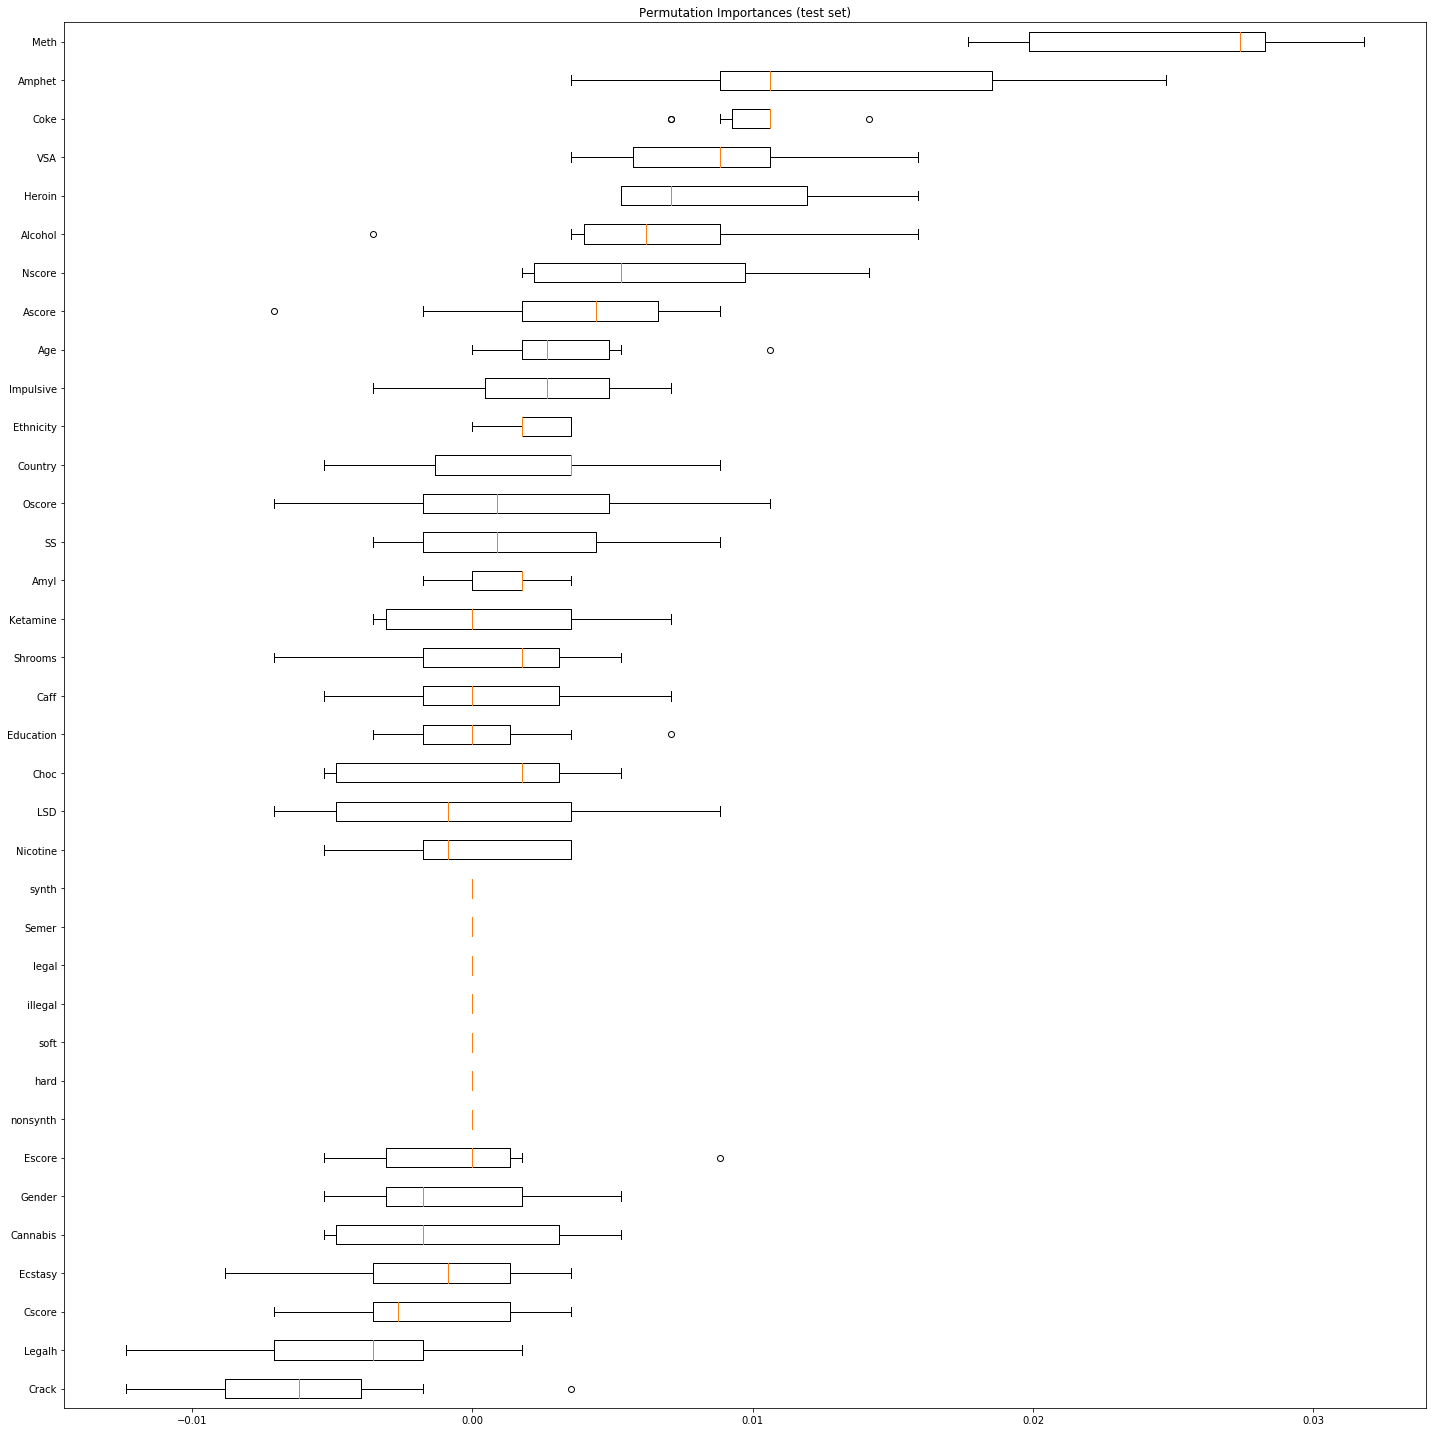

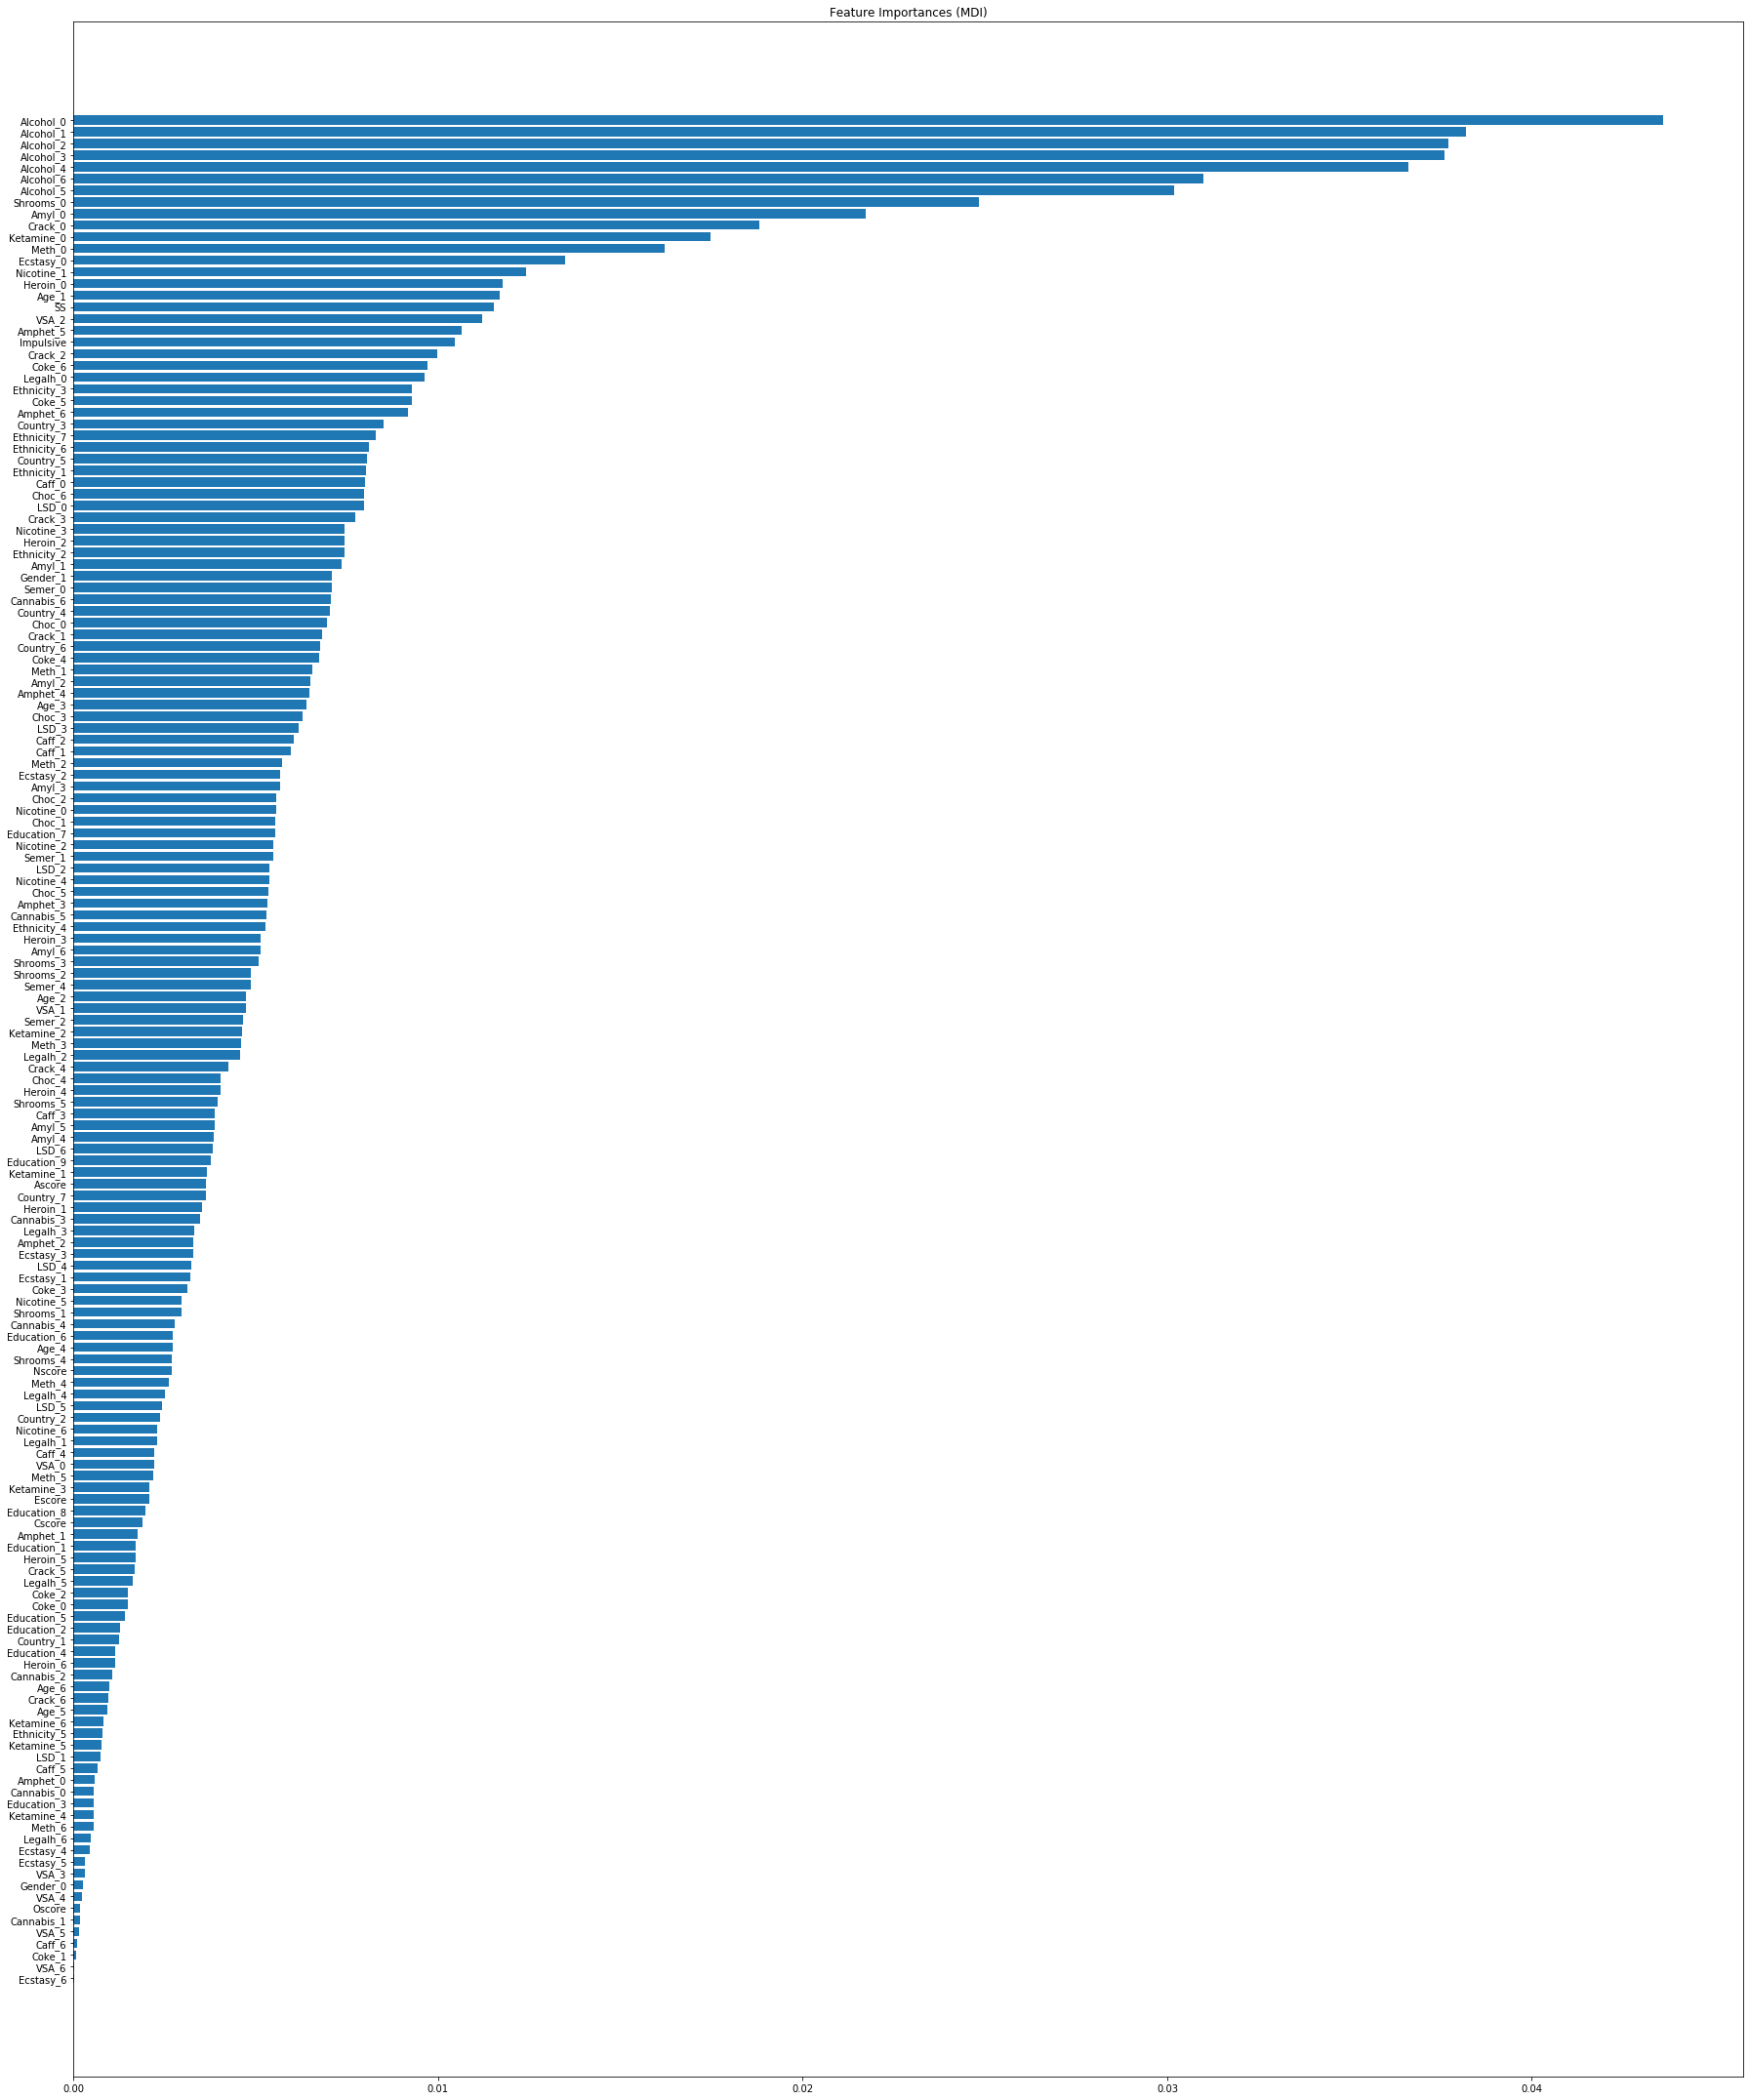

<class 'sklearn.svm._classes.SVC'>
Confusion Matrix :
[[670   3   7  13   0   0   0]
 [ 69   6  11   1   0   0   0]
 [118   5  28  26   0   0   0]
 [102   2  21  31   0   1   3]
 [ 41   1  10  25   0   0   0]
 [ 32   0   5  23   0   1   0]
 [ 21   1  13  26   0   0   3]]
Accuracy Score : 0.5602729340409401
Report : 
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       693
           1       0.33      0.07      0.11        87
           2       0.29      0.16      0.21       177
           3       0.21      0.19      0.20       160
           4       0.00      0.00      0.00        77
           5       0.50      0.02      0.03        61
           6       0.50      0.05      0.09        64

    accuracy                           0.56      1319
   macro avg       0.35      0.21      0.20      1319
weighted avg       0.47      0.56      0.47      1319



/Users/eikerogall/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

In [110]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC,
    DecisionTreeClassifier
]
for model in models:
    print(str(model))
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model())])
    pipe.fit(X_min_train, y_min_train)
    y_min_train_predicted = cross_val_predict(pipe,
                                              X_min_train,
                                              y_min_train,
                                              cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_min_train, y_min_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :', accuracy_score(y_min_train,
                                             y_min_train_predicted))
    print('Report : ')
    print(classification_report(y_min_train, y_min_train_predicted))

    # permutation importance
    result = permutation_importance(pipe,
                                    X_min_test,
                                    y_min_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_min_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    try:
        # feature importance
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_features_min)
        feature_names = np.r_[feature_names, num_features_min]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work')

The **XGBoost Classifier** and the **Random Forest** perform best on the data. 
Due to slightly better values in precision, we are going with the **XGBClassifier** as a **baseline model**. 

#### Feature Importance Base Model

Feature Importances were computet in the pipeline via permutation importance.

Most important features according to the XGBoost Classifier are: 
- Crack_0
- Shrooms_0
- Amy_1
- Ketamine_0
- Amyl_1
- Crack_2
- LSD_0
- Ecstasy_0
- Amyl_3

Most important features according to the RandomForest Classifier on engineered data are: 
- Amphet_2
- Alcohol_0
- Alcohol_2
- Alcohol_4
- Alcohol_1
- Alcohol_3
- Alcohol_6
- Alcohol_5
- Shrooms_0
- Crack_0

### Apply Pipeline for Benzos on Engineered Dataset

In [ ]:
drug_risk.head()

In [ ]:
cat_features = c2 + c3 + c4
cat_features.remove('Benzos')

In [ ]:
num_features = c5

In [ ]:
# Define predictors and target variable
X = drug_risk.drop('Benzos', axis=1)
y = drug_risk['Benzos']
print(X.shape)
print(y.shape)

In [ ]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Pipline for numerical features
cont_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor = ColumnTransformer([
    ('num', cont_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [ ]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC,
    DecisionTreeClassifier
]
for model in models:
    print(str(model))
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model())])
    pipe.fit(X_train, y_train)
    y_train_predicted = cross_val_predict(pipe, X_train, y_train, cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_train, y_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :', accuracy_score(y_train, y_train_predicted))
    print('Report : ')
    print(classification_report(y_train, y_train_predicted))

    # permutation importance
    result = permutation_importance(pipe,
                                    X_test,
                                    y_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    try:
        # feature importance
        ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_features)
        feature_names = np.r_[feature_names, num_features]
        tree_feature_importances = (
            pipe.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')

#### Feature Importance Applied Model

Most important features according to the XGBoost Classifier on engineered data are: 
- Crack_1.0
- Amy_2.0
- Shrooms_1.0
- Nscore
- Ketamine_1.0
- Crack_3.0
- Amyl_1.0
- LSD_1.0

Most important features according to the RandomForest Classifier on engineered data are: 
- Amphet_2
- Alcohol_0
- Alcohol_2
- Alcohol_4
- Alcohol_1
- Alcohol_3
- Alcohol_6
- Alcohol_5

In [ ]:
clf = XGBClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(15)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [ ]:
clf2 = RandomForestClassifier(n_estimators=50)
clf2 = clf2.fit(X, y)
clf2.feature_importances_  

In [ ]:
feat_importances = pd.Series(clf2.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(15)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [ ]:
df_dummies.shape

In [ ]:
df_dummies.columns

In [ ]:
list_benzos = ['Benzos_0', 'Benzos_1', 'Benzos_2', 'Benzos_3', 'Benzos_4', 'Benzos_5', 'Benzos_6']
for x in list_benzos:
    df_dummies_wo_b = df_dummies.drop(x, axis=1)

df_dummies_wo_b.shape


In [ ]:
X_dum = df_dummies_wo_b
y_dum = df_dummies['Benzos_6']
print(X_dum.shape)
print(y_dum.shape)

In [ ]:
# Split into train and test set
X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, test_size=0.3, random_state=42)

In [ ]:
clf_dum = XGBClassifier(n_estimators=50)
clf_dum = clf_dum.fit(X_dum, y_dum)
clf_dum.feature_importances_  

In [ ]:
feat_importances = pd.Series(clf_dum.feature_importances_, index=X_dum.columns)
# determine 20 most important features
dum_imp_feat = feat_importances.nlargest(15)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
dum_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
dum_imp_feat.plot(kind='barh')
plt.show()
print(dum_imp_feat)

## Target Variable: Hardliners

### Pipeline for Hard Score Predictions

In [ ]:
df_hardliner = drug_risk_min.drop(['Nscore', 'Escore', 'Impulsive', 'SS'], axis=1)

In [ ]:
df_hardliner.head()

In [ ]:
c2 = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
    'Shrooms', 'Nicotine', 'Semer', 'VSA'
]

In [ ]:
c3 = ['Age', 'Gender', 'Ethnicity', 'Education', 'Country']

In [ ]:
c4 = ['soft', 'hard', 'legal', 'illegal', 'synth', 'nonsynth', 'ill_rec']

In [ ]:
c5 = ['Oscore', 'Ascore', 'Cscore']

In [ ]:
df_hardliner['hard_score'] = drug_risk['hard_score']
df_hardliner.head()

In [ ]:
cat_var = c2 + c3
cat_var

In [ ]:
num_var = c5
num_var

In [ ]:
# Define predictors and target variable
X_hard = df_hardliner.drop('hard_score', axis=1)
y_hard = df_hardliner['hard_score']
print(X_hard.shape)
print(y_hard.shape)

In [ ]:
X_hard

In [ ]:
df_hardliner.hard_score.describe()

In [ ]:
y_hard = pd.cut(df_hardliner.hard_score ,bins=[-7.059790,-1.570720,0.005860,1.581860,6.874530],labels=[1,2,3,4])

In [ ]:
y_hard.fillna(2, inplace=True)

In [ ]:
y_hard.count()

In [ ]:
# Split into train and test set
X_hard_train, X_hard_test, y_hard_train, y_hard_test = train_test_split(
    X_hard, y_hard, test_size=0.3, random_state=42)

In [ ]:
# Pipline for numerical features
cont_pipeline_hard = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline_hard = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor_hard = ColumnTransformer([
    ('num', cont_pipeline, num_var),
    ('cat', cat_pipeline, cat_var)
])

In [ ]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC,
    DecisionTreeClassifier
]
for model in models:
    print(str(model))
    pipe_hard = Pipeline([('preprocessor', preprocessor_hard),
                          ('classifier', model())])
    pipe_hard.fit(X_hard_train, y_hard_train)
    y_hard_train_predicted = cross_val_predict(pipe_hard,
                                               X_hard_train,
                                               y_hard_train,
                                               cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_hard_train, y_hard_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :',
          accuracy_score(y_hard_train, y_hard_train_predicted))
    print('Report : ')
    print(classification_report(y_hard_train, y_hard_train_predicted))

    # permutation importance
    result = permutation_importance(pipe_hard,
                                    X_hard_test,
                                    y_hard_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_hard_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()

    try:
        # feature importance
        ohe = (pipe_hard.named_steps['preprocessor'].
               named_transformers_['cat'].named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_var)
        feature_names = np.r_[feature_names, num_var]
        tree_feature_importances = (
            pipe_hard.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')

#### Feature Importance for Hardliners 

Feature Importances were computet in the pipeline via permutation importance.

Most important features according to the XGBoost Classifier are: 
- 

### Pipline for Hardliner Prediction

In [ ]:
cat_var1 = c2 + c3 + c4
cat_var1

In [ ]:
num_var1 = c5
num_var1

In [ ]:
c4 = [
    'soft', 'hard', 'legal', 'illegal', 'synth', 'nonsynth', 'ill_rec'
]

df_hardliner[c4] = drug_risk[c4]

In [ ]:
#df_hardliner = df_hardliner.drop(['hardliner'], axis=1)

In [ ]:
df_hardliner.head()

In [ ]:
# Define predictors and target variable
X_hard1 = df_hardliner

In [ ]:
X_hard1.drop('hard_score', axis=1,inplace=True)

In [ ]:
X_hard1

In [ ]:
y_hard1 = drug_risk['hardliner']
print(X_hard.shape)
print(y_hard.shape)

In [ ]:
# Split into train and test set
X_hard1_train, X_hard1_test, y_hard1_train, y_hard1_test = train_test_split(
    X_hard1, y_hard1, test_size=0.3, random_state=42)

In [ ]:
# Pipline for numerical features
cont_pipeline_hard1 = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline_hard1 = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor_hard1 = ColumnTransformer([
    ('num', cont_pipeline, num_var1),
    ('cat', cat_pipeline, cat_var1)
])

In [ ]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier,
    DecisionTreeClassifier, SVC
]
for model in models:
    print(str(model))
    pipe_hard1 = Pipeline([('preprocessor', preprocessor_hard1),
                           ('classifier', model())])
    pipe_hard1.fit(X_hard1_train, y_hard1_train)
    y_hard1_train_predicted = cross_val_predict(pipe_hard1,
                                                X_hard1_train,
                                                y_hard1_train,
                                                cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_hard1_train, y_hard1_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :',
          accuracy_score(y_hard1_train, y_hard1_train_predicted))
    print('Report : ')
    print(classification_report(y_hard1_train, y_hard1_train_predicted))

    # permutation importance
    result = permutation_importance(pipe_hard,
                                    X_hard1_test,
                                    y_hard1_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_hard1_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    try:
        # feature importance
        ohe = (pipe_hard1.named_steps['preprocessor'].
               named_transformers_['cat'].named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_var1)
        feature_names = np.r_[feature_names, num_var1]
        tree_feature_importances = (
            pipe_hard1.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not run.')

## Target Variable: Education

### Pipeline for Education Prediction

In [ ]:
df_education = drug_risk

In [ ]:
df_education.head()

In [ ]:
c2 = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
    'Shrooms', 'Nicotine', 'Semer', 'VSA'
]

In [ ]:
c3 = ['Age', 'Gender', 'Ethnicity', 'Country']

In [ ]:
c4 = ['soft', 'hard', 'legal', 'illegal', 'synth', 'nonsynth', 'ill_rec']

In [ ]:
c5 = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

In [ ]:
cat_var3 = c2 + c3 + c4
cat_var3

In [ ]:
num_var3 = c5
num_var3

In [ ]:
# Define predictors and target variable
X_ed = df_education.drop('Education', axis=1)
y_ed = df_education['Education']
print(X_ed.shape)
print(y_ed.shape)

In [ ]:
# Split into train and test set
X_ed_train, X_ed_test, y_ed_train, y_ed_test = train_test_split(
    X_ed, y_ed, test_size=0.3, random_state=42)

In [ ]:
# Pipline for numerical features
cont_pipeline_ed = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline_ed = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor_ed = ColumnTransformer([
    ('num', cont_pipeline, num_var3),
    ('cat', cat_pipeline, cat_var3)
])

In [111]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC,
    DecisionTreeClassifier
]
for model in models:
    print(str(model))
    pipe_ed = Pipeline([('preprocessor', preprocessor_ed),
                        ('classifier', model())])
    pipe_ed.fit(X_ed_train, y_ed_train)
    y_ed_train_predicted = cross_val_predict(pipe_ed,
                                             X_ed_train,
                                             y_ed_train,
                                             cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_ed_train, y_ed_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :', accuracy_score(y_ed_train, y_ed_train_predicted))
    print('Report : ')
    print(classification_report(y_ed_train, y_ed_train_predicted))

    # permutation importance
    result = permutation_importance(pipe_ed,
                                    X_ed_test,
                                    y_ed_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_ed_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    try:
        # feature importance
        ohe = (pipe_ed.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_var3)
        feature_names = np.r_[feature_names, num_var3]
        tree_feature_importances = (
            pipe_ed.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')

<class 'xgboost.sklearn.XGBClassifier'>


NameError: name 'preprocessor_ed' is not defined

## Target Variable: Illegal Drugs

In [ ]:
c3 = ['Age', 'Gender', 'Ethnicity', 'Country', 'hardliner']
c5 = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

In [ ]:
var_lst = c3 + c5
var_lst.append('illegal')
var_lst
cat_var4 = c3
cat_var4

In [ ]:
num_var4 = c5
num_var4

In [ ]:
df_illegal = drug_risk[var_lst]

In [ ]:
# Define predictors and target variable
X_ill = df_illegal.drop('illegal', axis=1)
y_ill = df_illegal['illegal']
print(X_ill.shape)
print(y_ill.shape)

In [ ]:
# Split into train and test set
X_ill_train, X_ill_test, y_ill_train, y_ill_test = train_test_split(
    X_ill, y_ill, test_size=0.3, random_state=42)

In [ ]:
# Pipline for numerical features
cont_pipeline_ill = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
# Pipeline for categorical features
cat_pipeline_ill = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])
# Complete pipeline
preprocessor_ill = ColumnTransformer([
    ('num', cont_pipeline, num_var4),
    ('cat', cat_pipeline, cat_var4)
])

In [ ]:
# Building a full pipeline with our preprocessor
models = [
    XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC,
    DecisionTreeClassifier
]
for model in models:
    print(str(model))
    pipe_ill = Pipeline([('preprocessor', preprocessor_ill),
                         ('classifier', model())])
    pipe_ill.fit(X_ill_train, y_ill_train)
    y_ill_train_predicted = cross_val_predict(pipe_ill,
                                              X_ill_train,
                                              y_ill_train,
                                              cv=5)

    # confusion matrix and classification report
    results = confusion_matrix(y_ill_train, y_ill_train_predicted)
    print('Confusion Matrix :')
    print((results))
    print('Accuracy Score :', accuracy_score(y_ill_train,
                                             y_ill_train_predicted))
    print('Report : ')
    print(classification_report(y_ill_train, y_ill_train_predicted))

    # permutation importance
    result = permutation_importance(pipe_ill,
                                    X_ill_test,
                                    y_ill_test,
                                    n_repeats=10,
                                    random_state=42,
                                    n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False,
               labels=X_ill_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    try:
        # feature importance
        ohe = (pipe_ill.named_steps['preprocessor'].named_transformers_['cat'].
               named_steps['1hot'])
        feature_names = ohe.get_feature_names(input_features=cat_var4)
        feature_names = np.r_[feature_names, num_var4]
        tree_feature_importances = (
            pipe_ill.named_steps['classifier'].feature_importances_)
        sorted_idx = tree_feature_importances.argsort()
        y_ticks = np.arange(0, len(feature_names))
        fig, ax = plt.subplots(figsize=(25, 30))
        ax.barh(y_ticks, tree_feature_importances[sorted_idx])
        ax.set_yticklabels(feature_names[sorted_idx])
        ax.set_yticks(y_ticks)
        ax.set_title("Feature Importances (MDI)")
        fig.tight_layout()
        plt.show()
    except:
        print('Did not work!')

#### Feature Importances

Important features in predictiong illegal drug consumption:

RandomForestClassifier:
+ Age_3
+ Age_5
+ Gender_0
+ Age_1
+ Age_2
+ Age_4

SupportVectorMachine (Permutation Importance):
+ SS
+ Ethnicity
+ Oscore
+ Country


## GridSearch Hardliners XGBoost

In [ ]:
xgb_pipe = Pipeline([('preprocessor_xgb', preprocessor_hard1), ('classifier_xgb', XGBClassifier())])

In [ ]:
parameters_xgb = {
    'classifier_xgb__max_depth': [2, 3],
    'classifier_xgb__n_estimators': [100, 250, 500, 750, 1000],
    'classifier_xgb__learning_rate': [0.1, 0.5, 1, 0.01],
}

In [ ]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=parameters_xgb,
    n_jobs = -1,
    cv = 10,
    verbose=5,
    scoring='recall'
)

X_hard1_train, X_hard1_test, y_hard1_train, y_hard1_test = train_test_split(
    X_hard1, y_hard1, test_size=0.3, random_state=42)

In [ ]:
grid_search_xgb.fit(X_hard1_train, y_hard1_train)

In [ ]:
print("Best parameters:\n{}".format(grid_search_xgb.best_params_))

In [ ]:
best_model_xgb = grid_search_xgb.best_estimator_['classifier_xgb']

In [ ]:
preprocessor_hard1.fit(X_hard1_train)
X_test_preprocessed_xgb = preprocessor_hard1.transform(X_hard1_test)

In [ ]:
y_test_predicted_xgb = best_model_xgb.predict(X_test_preprocessed)

results = confusion_matrix(y_hard1_test, y_test_predicted_xgb)
print('Confusion Matrix :')
print((results))
print('Accuracy Score :', accuracy_score(y_hard1_test, y_test_predicted_xgb))
print('Report : ')
print(classification_report(y_hard1_test, y_test_predicted_xgb))


## GridSearch Illegal Drugs SVM

In [ ]:
svm_pipe = Pipeline([('preprocessor', preprocessor_ill),
                    ('classifier', SVC())])

In [ ]:
parameters_svm = [
    {
        'classifier__C': [1, 10, 100, 1000],
        'classifier__kernel': ['linear']
    },
    {
        'classifier__C': [1, 10, 100, 1000],
        'classifier__gamma': [0.001, 0.0001],
        'classifier__kernel': ['rbf']
    },
]

my_scorer = make_scorer(f1_score, average='weighted')
#my_scorer = {'accuracy': make_scorer(accuracy_score),
#             'precision': make_scorer(precision_score, average = 'macro'),
#             'recall': make_scorer(recall_score, average = 'macro'),
#             'f1_macro': make_scorer(f1_score, average = 'macro'),
#             'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [ ]:
grid_search_svm = GridSearchCV(
    estimator=rf_pipe,
    param_grid=parameters_svm,
    n_jobs = -1,
    cv = 10,
    verbose=5,
    scoring= my_scorer
)

X_ill_train, X_ill_test, y_ill_train, y_ill_test = train_test_split(
    X_ill, y_ill, test_size=0.3, random_state=42)

In [ ]:
grid_search_svm.fit(X_ill_train, y_ill_train)

In [ ]:
print("Best parameters:\n{}".format(grid_search_svm.best_params_))

In [ ]:
best_model_svm = grid_search_svm.best_estimator_['classifier']

In [ ]:
preprocessor_ill.fit(X_ill_train)
X_test_preprocessed_svm = preprocessor_ill.transform(X_ill_test)

In [ ]:
X_ill_train.shape

In [ ]:
y_ill_test.shape

In [ ]:
y_test_predicted_svm = best_model_svm.predict(X_test_preprocessed_svm)

results = confusion_matrix(y_ill_test, y_test_predicted_svm)
print('Confusion Matrix :')
print((results))
print('Accuracy Score :', accuracy_score(y_ill_test, y_test_predicted_svm))
print('Report : ')
print(classification_report(y_ill_test, y_test_predicted_svm))

# permutation importance
result = permutation_importance(best_model_svm,
                                X_ill_test,
                                y_ill_test,
                                n_repeats=10,
                                random_state=42,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False,
           labels=X_ill_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# Data Visualisation

In [ ]:
country_dict = {
    1: 'Australia',
    2: 'Canada',
    3: 'New Zealand',
    4: 'Other',
    5: 'Republic of Ireland',
    6: 'UK',
    7: 'USA'
}

In [ ]:
drug_risk_country = drug_risk['Country'].map(country_dict)

In [ ]:
drug_risk_country.rename('Country_names', axis=1, inplace=True)

In [ ]:
drug_risk_country = pd.concat([drug_risk, drug_risk_country], axis=1)

In [ ]:
drug_risk_country.groupby('Country_names')['ill_rec'].count()

In [ ]:
chart = sns.countplot(x='Country_names',
                      data=drug_risk_country,
                      palette='YlGnBu')
chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right')

## Percentage of hardliner per Country and per Total

In [ ]:
country_hard = []
percent_hard = []
for i in range(1, 8):

    country_hard.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i}'))
    y = drug_risk_country.query(f'Country == {i}')['hardliner'].sum()
    perc = y / x * 100
    percent_hard.append(perc)

In [ ]:
chart1 = sns.barplot(x=country_hard, y=percent_hard, palette='YlGnBu')
chart1.set(xlabel='', ylabel='Percentage of Hardliners per Country')
chart1.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

In [ ]:
df_2 = drug_risk_country.groupby('Country_names').sum()
df_2.reset_index(inplace=True)
chart1 = sns.barplot(x='Country_names',
                     y='hardliner',
                     data=df_2,
                     palette='YlGnBu')
chart1.set(xlabel='', ylabel='Absulute Number of Hardliners per Country')
chart1.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

## Percentage of Hard drug users per Country and per Total

In [ ]:
country_harddr = []
percent_harddr = []
for i in range(1, 8):
    country_harddr.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i}'))
    y = drug_risk_country.query(f'Country == {i}')['hard'].sum()
    perc = y / x * 100
    percent_harddr.append(perc)

In [ ]:
chart2 = sns.barplot(x=country_harddr, y=percent_harddr, palette='YlGnBu')
chart2.set(xlabel='', ylabel='Percentage of Hard users per Country')
chart2.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

In [ ]:
df_2 = drug_risk_country.groupby('Country_names').sum()
df_2.reset_index(inplace=True)
chart2_1 = sns.barplot(x='Country_names',
                       y='hard',
                       data=df_2,
                       palette='YlGnBu')
chart2_1.set(xlabel='', ylabel='Absolute Number of hard drug users')
chart2_1.set_xticklabels(chart2.get_xticklabels(), rotation=45)

## Percentage of illegal drug users per Country and per Total

In [ ]:
drug_risk['illegal'].value_counts()

In [ ]:
country_illegal = []
percent_illegal = []
illegal = []
for i in range(1, 8):
    country_illegal.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i}'))
    y = drug_risk_country.query(f'Country == {i}')['illegal'].sum()
    illegal.append(y)
    perc = y / x * 100
    percent_illegal.append(perc)

In [ ]:
sum(illegal)

In [ ]:
chart2 = sns.barplot(x=country_illegal, y=percent_illegal, palette='YlGnBu')
chart2.set(xlabel='', ylabel='Percentage of illegal drug users per Country')
chart2.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

In [ ]:
df_2 = drug_risk_country.groupby('Country_names').sum()
df_2.reset_index(inplace=True)
chart3 = sns.barplot(x='Country_names',
                     y='illegal',
                     data=df_2,
                     palette='YlGnBu')
chart3.set(xlabel='', ylabel='Absolute Number of illegal drug users')
chart3.set_xticklabels(chart3.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

## Percentage of People that recently consumed illegal drugs per Country

In [ ]:
country_rec = []
percent_rec = []
for i in range(1, 8):
    country_rec.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i}'))
    y = drug_risk_country.query(f'Country == {i}')['ill_rec'].sum()
    perc = y / x * 100
    percent_rec.append(perc)

In [ ]:
chart4 = sns.barplot(x=country_rec, y=percent_rec, palette='YlGnBu')
chart4.set(xlabel='',
           ylabel='Percentage of recent illegal drug users per Country')
chart4.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

## Drug use by Hardliners

In [ ]:
country_hard_rec = []
percent_hard_rec = []
for i in range(1, 8):
    country = drug_risk_country.query(
        f'Country == {i}')['Country_names'].iloc[0]
    country_hard_rec.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i} & hardliner == 1'))
    y = drug_risk_country.query(
        f'Country == {i} & hardliner == 1')['ill_rec'].sum()
    perc = y / x * 100
    percent_hard_rec.append(perc)

In [ ]:
chart4 = sns.barplot(x=country_hard_rec, y=percent_hard_rec, palette='YlGnBu')
chart4.set(
    xlabel='',
    ylabel='Percentage of hardliner recent illegal\n drug users per Country')
chart4.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

In [ ]:
country_hard_ill = []
percent_hard_ill = []
for i in range(1, 8):
    country_hard_ill.append(
        drug_risk_country.query(f'Country == {i}')['Country_names'].iloc[0])
    x = len(drug_risk_country.query(f'Country == {i} & hardliner == 1'))
    y = drug_risk_country.query(
        f'Country == {i} & hardliner == 1')['illegal'].sum()
    perc = y / x * 100
    percent_hard_ill.append(perc)

In [ ]:
chart5 = sns.barplot(x=country_hard_ill, y=percent_hard_ill, palette='YlGnBu')
chart5.set(xlabel='',
           ylabel='Percentage of hardliner\n illegal drug users per Country')
chart5.set_xticklabels(chart1.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

In [ ]:
round(drug_risk.groupby('hardliner')[list_drugs].mean(),2)

In [ ]:
drug_risk_country.query('Semer > 0')

# Future Work

**Improvements for the data set**
+ collect data on socioeconomic status
+ collect data on amount of drug doses
+ collect data on clinical diagnoses
+ collect data on abuse and addiction
+ collect timeline data to identify co-morbidity of diverse substance abuse or/and addiction
<br>

**Improvments for the models**
+ try unsupervised machine learning models 
+ apply regression models on continuous data
+ new model for hardliner prediction


# Conclusion
We created, with the **hardliner**, a new feature to predict the people, who are **most likely** to consume drugs. The prediction of these hardliners with our model did not work well, even though we had an **accuracy of 89%**, based on the data the recall score of that model was at 12% to predict hardliners correctly. After the GridSearch the **recall score increased to 19%** but is still too low for predicting the hardliners in that data set. <br>
Our second model to predict the users of illegal drugs on the other hand **predicted 94%** of the illegal drug users correctly and had a **accuracy score of 84%**.<br>